In [1]:
# Packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import warnings
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt

URV                                                                            MESIIA

Neural and Evolutionary Computation (NEC)

Assignment 2: Classification with SVM, BP and MLR

Teachers: Dr. Jordi Duch, Dr. Sergio Gomez

Student: Natzaret Gálvez Rísquez

Part 1: Selecting and analyzing the datasets

We will perform the classification in the following three datasets:

In [2]:
# We upload the datasets

# First dataset: File: A2-ring.txt
    # Training set 1 : ring-separable.txt
    # Training set 2 : ring-merged.txt
    # Two different training sets, one easy (separable) and one more difficult (merged)

    # Test (valid for set1 and set2): ring-test.txt (Only one test set for both training sets)
    # 2 input features + 1 class identifier (0 / 1)
    # All data files have 10000 patterns
    
A2_ring_merged=pd.read_csv('C:/Users/Gari/Desktop/Assignments_NEC/A2/A2-ring/A2-ring-merged.txt', sep='\t', header=None)
A2_ring_separable=pd.read_csv('C:/Users/Gari/Desktop/Assignments_NEC/A2/A2-ring/A2-ring-separable.txt', sep='\t', header=None)
A2_ring_test=pd.read_csv('C:/Users/Gari/Desktop/Assignments_NEC/A2/A2-ring/A2-ring-test.txt', sep='\t', header=None)

df_A2_ring_merged=pd.DataFrame(A2_ring_merged)
df_A2_ring_separable=pd.DataFrame(A2_ring_separable)
df_A2_ring_test=pd.DataFrame(A2_ring_test)

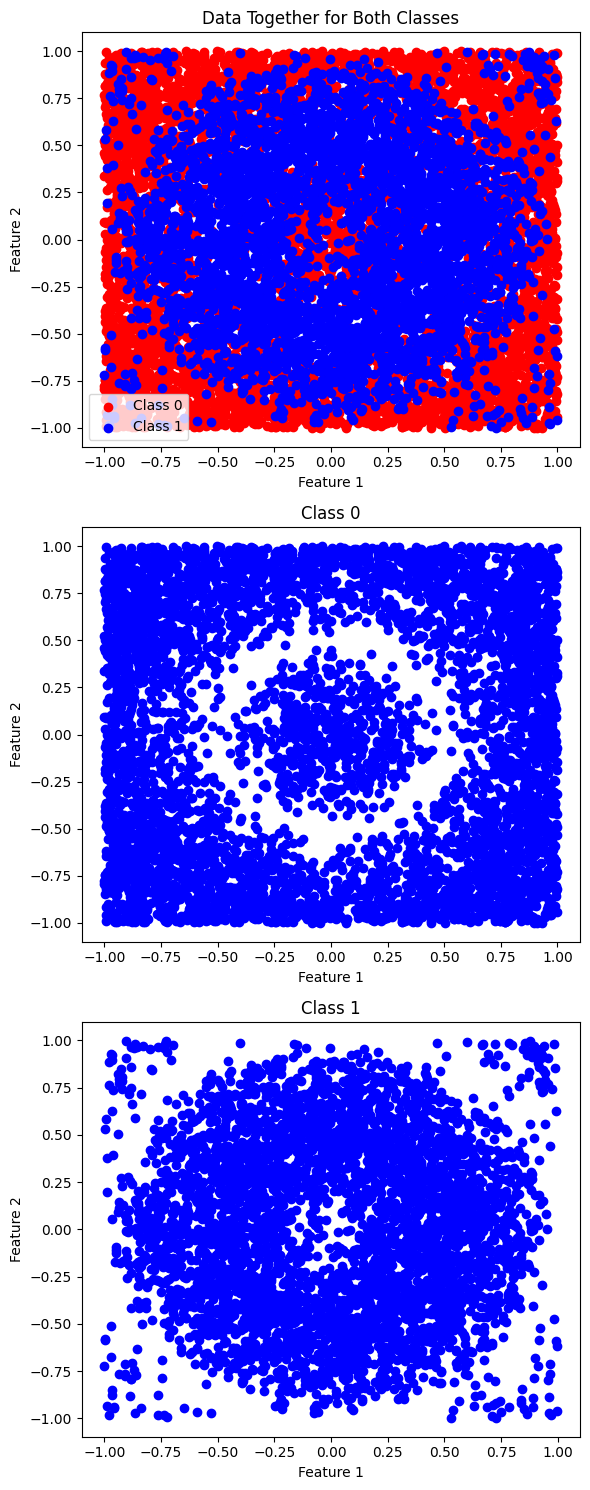

In [3]:
# We plot the two input features

# Create separate DataFrames for each class
class_0_data = df_A2_ring_merged[df_A2_ring_merged[2] == 0]
class_1_data = df_A2_ring_merged[df_A2_ring_merged[2] == 1]

# Plotting the data
plt.figure(figsize=(6, 15))

# Plotting together for both classes
plt.subplot(3, 1, 1)
plt.scatter(class_0_data[0], class_0_data[1], color='red', label='Class 0')
plt.scatter(class_1_data[0], class_1_data[1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Together for Both Classes')
plt.legend()

# Plotting separate plots for each class
plt.subplot(3, 1, 2)
plt.scatter(class_0_data[0], class_0_data[1], color='blue', label='Class 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Class 0')

plt.subplot(3, 1, 3)
plt.scatter(class_1_data[0], class_1_data[1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Class 1')

plt.tight_layout()
plt.show()

In [4]:
# Second dataset: File: A2-bank.txt
    # Data: bank-additional.csv (4119 patterns) or bank-additional-full.csv (41188 patterns), we choose one of them (the first is a subset of the second)
    # Training: select the first 80% patterns for training
    # Test: select the last 20% patterns for test
    # Features: 20 features, most of them categorical, you will have to properly represent them as numerical data before training
    # Input features: features that refer to the bank client, last contact in the current campaign, other attributes, and social and economic context attributes
    # Prediction feature: the last one (yes/no), which corresponds to whether the client has subscribed a term deposit or not
    # Observation: missing information is tagged as “unknown”

bank_additional=pd.read_csv('C:/Users/Gari/Desktop/Assignments_NEC/A2/A2-bank/bank-additional.csv', sep=';', header=None)
#bank_additional_full=pd.read_csv('C:/Users/Gari/Desktop/Assignments_NEC/A2/A2-bank/bank-additional-full.csv', sep=';', header=None)
#bank_additional_names= pd.read_csv('C:/Users/Gari/Desktop/Assignments_NEC/A2/A2-bank/bank-additional-names.txt', sep="\t", header=None)

df_bank_additional=pd.DataFrame(bank_additional)
#df_bank_additional_full=pd.DataFrame(bank_additional_full)

In [5]:
# Third dataset: from "https://www.kaggle.com/datasets/fatemehmehrparvar/liver-disorders?resource=download"
    # At least 6 features, one of them used for classification
    # he classification feature can be binary or multivariate
    # At least 400 patterns
    # Select randomly 80% of the patterns for training and validation, and the remaining 20% for test; it is important to shuffle the original data, to destroy any kind of sorting it could have

# Indian liver patient dataset [584 rows x 11 columns]
liver_Disorder=pd.read_csv('C:/Users/Gari/Desktop/Assignments_NEC/A2/Indian Liver Patient Dataset (ILPD).csv', sep=',', header=None)

# data (as pandas dataframes) 
df_liver_Disorder=pd.DataFrame(liver_Disorder)

#We drop the header
# Drop the first row
df_liver_Disorder = df_liver_Disorder.drop(df_liver_Disorder.index[0])

Now, we will do the data preprocessing to later do the data splitting.

In [6]:
# Handling missing values, we check for and handle any missing values in our datasets
# Categorical values, if there are categorical variables, we encode them appropriately
# Outliers, we identify and handle the outliers in the data
# Normalization, in case is needed

# Data Preprocessing for Dataset 1 and 2
# - Normalize input and output variables
# - No need to preprocess (datasets already cleaned)

# Data Preprocessing for Dataset 3
# - Link to the source webpage to the documentation: ""https://www.kaggle.com/datasets/fatemehmehrparvar/liver-disorders?resource=download"
# - Check for missing values, represent categorical values, look for outliers
# - Normalize input/output variables if needed

A2-ring dataset

In [7]:
# A2-ring
# We normalize the data that has been already splitted
X_A2_ring_separable = df_A2_ring_separable.iloc[:, :-1]  # Features separable (all columns except the last one)
y_A2_ring_separable = df_A2_ring_separable.iloc[:, -1]  # Target variable

X_A2_ring_merged = df_A2_ring_merged.iloc[:, :-1]  # Features merged
y_A2_ring_merged = df_A2_ring_merged.iloc[:, -1]  # Target variable

X_A2_ring_test = df_A2_ring_test.iloc[:, :-1]  # Features
y_A2_ring_test = df_A2_ring_test.iloc[:, -1]  # Target variable

scaler_ring = MinMaxScaler()
X_train_ring_separable = scaler_ring.fit_transform(X_A2_ring_separable) # Training set 1
# Reshape the array to a 2D shape (required by MinMaxScaler)
y_train_ring_separable = scaler_ring.fit_transform(y_A2_ring_separable.values.reshape(-1, 1))

X_train_ring_merged = scaler_ring.fit_transform(X_A2_ring_merged) # Trainig set 2
y_train_ring_merged = scaler_ring.fit_transform(y_A2_ring_merged.values.reshape(-1, 1))

X_test_ring_normalized = scaler_ring.fit_transform(X_A2_ring_test) # Test
y_test_ring_normalized = scaler_ring.fit_transform(y_A2_ring_test.values.reshape(-1, 1))

A2-bank dataset

In [8]:
# A2-bank

# Before normalizing the second dataset, it needs to be treated.
# We have to treat the categorical data and the "unknown" values.

# Treatment of the categorical data and the "unknown" values
# Replace "unknown" values with NaN
df_bank_additional.replace("unknown", np.nan, inplace=True)

# Handling missing values
df_bank_additional.fillna(df_bank_additional.mode().iloc[0], inplace=True)

# Extract the column names from the first row
df_bank_additional.columns = df_bank_additional.iloc[0]
df_bank_additional = df_bank_additional[1:]

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
categorical_columns = df_bank_additional.select_dtypes(include="object").columns

for column in categorical_columns:
    df_bank_additional[column] = label_encoder.fit_transform(df_bank_additional[column])

# Separate the target variable
X_bank_additional = df_bank_additional.drop("y", axis=1)  # Features
y_bank_additional = df_bank_additional["y"]  # Target variable

In [9]:
# A2-bank
# Now, we normalize the data
scaler_bank = MinMaxScaler()
X_train_bank_additional = scaler_bank.fit_transform(X_bank_additional) # bank additional
# Reshape the array to a 2D shape 
y_train_bank_additional = scaler_bank.fit_transform(y_bank_additional.values.reshape(-1, 1))

In [10]:
# A2-bank
# Split the data into validation-training and testing sets
# Extract the first 80% for training
# Extract the remaining 20% for testing
# Splitting A2-bank dataset
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(
    X_train_bank_additional, y_train_bank_additional, test_size=0.20, shuffle=False
)

Liver disorder dataset

In [11]:
# Liver disorder
# We check if this dataset have missing values:
missing_values_count = df_liver_Disorder.isnull().sum().sum()
print(f"Number of missing values in Liver disorder dataset: {missing_values_count}")

Number of missing values in Liver disorder dataset: 4


In [12]:
# We convert the categorical data into numerical
# Observing the dataset, there is a column with categorical data, which is the "Gender" with the name 1
gender_mapping = {'Female': 0, 'Male': 1}
df_liver_Disorder[1] = df_liver_Disorder[1].replace(gender_mapping)

In [13]:
# We handle missing values using median imputation
imputer = SimpleImputer(strategy='median')
df_liver_Disorder_imputed = pd.DataFrame(imputer.fit_transform(df_liver_Disorder), columns=df_liver_Disorder.columns)

In [14]:
missing_values_count = df_liver_Disorder_imputed.isnull().sum().sum()
print(f"Number of missing values in Liver disorder dataset: {missing_values_count}")

Number of missing values in Liver disorder dataset: 0


In [15]:
# Identify and handle outliers using IQR method
def handle_outliers_iqr(data, threshold=1.5):
    data_copy = data.copy()  # Create a copy to avoid SettingWithCopyWarning
    Q1 = data_copy.quantile(0.25)
    Q3 = data_copy.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    data_copy[(data_copy < lower_bound) | (data_copy > upper_bound)] = np.nan

    # Handle missing values using median imputation
    imputer = SimpleImputer(strategy='median')
    data_imputed = imputer.fit_transform(data_copy)
    
    # Convert back to DataFrame with original column names
    data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

    return data_imputed

# Handle outliers in all feature variables (columns) of df_liver_Disorder
df_liver_Disorder_no_outliers = handle_outliers_iqr(df_liver_Disorder_imputed)

# Shuffle
df_liver_Disorder_shuffled = df_liver_Disorder_no_outliers.sample(frac=1, random_state=42)

In [16]:
missing_values_count = df_liver_Disorder_shuffled.isnull().sum().sum()
print(f"Number of missing values in Liver disorder dataset: {missing_values_count}")

Number of missing values in Liver disorder dataset: 0


In [17]:
X_liver_Disorder = df_liver_Disorder_shuffled.iloc[:, :-1]
y_liver_Disorder = df_liver_Disorder_shuffled.iloc[:, -1]

# Normalize input variables
scaler_liver_Disorder = MinMaxScaler()
X_liver_Disorder_normalized_no_outliers = scaler_liver_Disorder.fit_transform(X_liver_Disorder)
y_liver_Disorder_normalized_no_outliers = scaler_liver_Disorder.fit_transform(y_liver_Disorder.values.reshape(-1, 1))

In [18]:
# Third dataset, Liver disorder
# Split the data into validation-training and testing sets
# Extract the first 80% for training
# Extract the remaining 20% for testing
# Splitting liver_Disorder dataset
X_train_liver_Disorder, X_test_liver_Disorder, y_train_liver_Disorder, y_test_liver_Disorder = train_test_split(
    X_liver_Disorder_normalized_no_outliers,
    y_liver_Disorder_normalized_no_outliers,
    test_size=0.2,
    random_state=42,
)

Part 2: Classification problem

We are going to perform supervised training of 3 classification models.

SVM (support vector machine)

In [19]:
# Parameters of SVM: kernel, and parameters
def evaluate_svm(X_train, y_train, X_test, y_test, kernel, C):
    from sklearn.svm import SVC
    
    # Create an SVM classifier with the desired parameters
    svm_classifier = SVC(kernel=kernel, C=C)
    
    # Perform cross-validation
    cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
    expected_error = 1 - np.mean(cv_scores)  # Expected classification error
    
    # Train the SVM classifier on the entire training set
    svm_classifier.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = svm_classifier.predict(X_test)
    
    # Calculate the classification error on the test set
    test_error = 1 - accuracy_score(y_test, y_pred)
    
    return expected_error, test_error

BP (back propagation)

In [27]:
# Parameters of BP: architecture of the network, learning rate and momentum, activation function, and number of epochs

import keras
from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold

def evaluate_bp(X_train, y_train, X_test, y_test, learning_rate, momentum, activation, epochs):
    # Function to create the predefined model
    def create_predefined_model():
        model = Sequential([
            Dense(32, activation=activation),
            Dense(10, activation=activation),
            Dense(5, activation=activation),
            Dense(1, activation='sigmoid')  # Assuming binary classification
        ])
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # Initialize KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True)
    cv_scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model = create_predefined_model()
        model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0)
        _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        cv_scores.append(accuracy)

    # Calculate expected error
    expected_error = 1 - np.mean(cv_scores)
    
    # Fit the final model on the entire training set
    final_model = create_predefined_model()
    final_model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)
    
    # Evaluate the final model on the test set
    test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)
    test_error = 1 - test_accuracy
    
    return expected_error, test_error

MLR (multi-linear regression)

In [21]:
def evaluate_mlr(X_train, y_train, X_test, y_test, C, solver):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score
    import numpy as np
    
    # Create a logistic regression classifier with the current parameters
    logistic_regression = LogisticRegression(C=C, solver=solver)
    
    # Perform cross-validation
    cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5)  # 5-fold cross-validation
    expected_error = 1 - np.mean(cv_scores)  # Expected classification error
    
    # Train the logistic regression classifier on the entire training set
    logistic_regression.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = logistic_regression.predict(X_test)
    
    # Calculate the classification error on the test set
    test_error = 1 - accuracy_score(y_test, y_pred)
    
    return expected_error, test_error

Automatic process to find the best parameters (kernel, C) for the SVM model

In [22]:
def tune_svm(X_train, y_train, X_test, y_test):
    # Set initial parameters
    C_values = [0.1, 1, 10, 100, 1000]  # Values for C
    kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']  # Values for kernel
    best_test_error = float('inf')
    best_expected_error = float('inf')
    best_params = {'kernel': None, 'C': None}

    # Tune C
    for C in C_values:
        # Calculate the classification error
        expected_error, test_error = evaluate_svm(X_train, y_train, X_test, y_test, kernel=kernel_values[0], C=C)
        
        # Update best error and parameters if current error is lower
        if test_error < best_test_error:
            best_test_error = test_error
            best_expected_error = expected_error
            best_params['C'] = C
        
    best_test_error = float('inf')  # Initialize with a large value
    best_expected_error = float('inf')
    # Tune kernel
    for kernel in kernel_values:
        expected_error, test_error = evaluate_svm(X_train, y_train, X_test, y_test, kernel=kernel, C=best_params['C'])
        
        # Update best error and parameters if current error is lower
        if test_error < best_test_error:
            best_test_error = test_error
            best_expected_error = expected_error
            best_params['kernel'] = kernel
    
    best_expected_error, best_test_error = evaluate_svm(X_train, y_train, X_test, y_test, kernel=best_params['kernel'], C=best_params['C'])

    return best_params, best_expected_error, best_test_error

Automatic process to find the best parameters (learning_rate, momentum, activation, epochs) for the BP model

In [23]:
def tune_backpropagation(X_train, y_train, X_test, y_test):
    # Set initial parameters
    learning_rates = [0.2, 0.15, 0.1, 0.015, 0.01]  # Values for learning rate
    momentums = [0.0, 0.3, 0.6, 0.9]  # Values for momentum
    activations = ['sigmoid', 'relu', 'linear', 'tanh']  # Values for activation
    epochs_values = [50, 100, 200, 500, 1000] # Number of epochs

    best_error  = float('inf')  # Initialize with a large value
    best_expected_error = float('inf')
    best_hyperparameters = {'learning_rate': None, 'momentum': None, 'activation': None, 'epochs': None}

    # Tune learning rate
    for learning_rate in learning_rates:
        expected_error, test_error = evaluate_bp(X_train, y_train, X_test, y_test, learning_rate, momentums[0], activations[0], epochs_values[0])
        if test_error < best_error:
            best_error = test_error
            best_expected_error = expected_error
            best_hyperparameters['learning_rate'] = learning_rate

    best_error = float('inf')  # Initialize with a large value
    best_expected_error = float('inf')
    # Tune momentum
    for momentum in momentums:
        expected_error, test_error = evaluate_bp(X_train, y_train, X_test, y_test, best_hyperparameters['learning_rate'], momentum, activations[0], epochs_values[0])
        if test_error < best_error:
            best_error = test_error
            best_expected_error = expected_error
            best_hyperparameters['momentum'] = momentum

    best_error = float('inf')  # Initialize with a large value
    best_expected_error = float('inf')
    # Tune activation
    for activation in activations:
        expected_error, test_error = evaluate_bp(X_train, y_train, X_test, y_test, best_hyperparameters['learning_rate'], best_hyperparameters['momentum'], activation, epochs_values[0])
        if test_error < best_error:
            best_error = test_error
            best_expected_error = expected_error
            best_hyperparameters['activation'] = activation

    best_error = float('inf')  # Initialize with a large value
    best_expected_error = float('inf')
    # Tune epochs
    for epochs in epochs_values:
        expected_error, test_error = evaluate_bp(X_train, y_train, X_test, y_test, best_hyperparameters['learning_rate'], best_hyperparameters['momentum'], best_hyperparameters['activation'], epochs)
        if test_error < best_error:
            best_error = test_error
            best_expected_error = expected_error
            best_hyperparameters['epochs'] = epochs

    best_expected_error, best_error = evaluate_bp(X_train, y_train, X_test, y_test, best_hyperparameters['learning_rate'], best_hyperparameters['momentum'], best_hyperparameters['activation'], best_hyperparameters['epochs'])

    return best_hyperparameters, best_expected_error, best_error

Automatic process to find the best parameters (C, solver) for the MLR model

In [24]:
def tune_logistic_regression(X_train, y_train, X_test, y_test):
    import warnings
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score
    from sklearn.linear_model import LogisticRegression
    import numpy as np
    
    warnings.filterwarnings("ignore")
    
    # Set initial parameters
    C_values = [0.01, 0.1, 1, 10, 100]  # Values for regularization parameter C
    solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Values for the optimization algorithm

    best_error = float('inf')  # Initialize with a large value
    best_expected_error = float('inf')
    best_params = {'C': None, 'solver': None}

    # Tune C
    for C in C_values:
        # Calculate the classification error
        expected_error, test_error = evaluate_mlr(X_train, y_train, X_test, y_test, C=C, solver=solver_values[0])

        # Update best error and C if current error is lower
        if test_error < best_error:
            best_error = test_error
            best_expected_error = expected_error
            best_params['C'] = C

    best_error = float('inf')  # Initialize with a large value
    best_expected_error = float('inf')
    # Tune solver
    for solver in solver_values:
        expected_error, test_error = evaluate_mlr(X_train, y_train, X_test, y_test, C=best_params['C'], solver=solver)
        # Update best error and solver if current error is lower
        if test_error < best_error:
            best_error = test_error
            best_expected_error = expected_error
            best_params['solver'] = solver

    # Calculate error for best parameters
    best_expected_error, best_error = evaluate_mlr(X_train, y_train, X_test, y_test, C=best_params['C'], solver=best_params['solver'])

    return best_params, best_expected_error, best_error

We call the before functions to finde the best parameters for our datasets for the three models (SVM, BP, MLR):

Dataset 1: A2-ring

In [25]:
X_train = X_train_ring_merged
y_train = y_train_ring_merged
X_test = X_test_ring_normalized
y_test = y_test_ring_normalized

warnings.filterwarnings("ignore")

#SVM
best_params_svm_D1, best_expected_error_svm, best_error_svm = tune_svm(X_train, y_train, X_test, y_test)
print("Best parameters for SVM:", best_params_svm_D1)
print("Expected classification error obtained from cross-validation:", best_expected_error_svm)
print("Best classification error on the test set for SVM:", best_error_svm)


Best parameters for SVM: {'kernel': 'rbf', 'C': 0.1}
Expected classification error obtained from cross-validation: 0.23019999999999996
Best classification error on the test set for SVM: 0.04300000000000004


In [29]:
# BP
best_params_bp_D1, best_expected_error_bp, best_error_bp = tune_backpropagation(X_train, y_train, X_test, y_test)
print("Best parameters for BP:", best_params_bp_D1)
print("Expected classification error obtained from cross-validation:", best_expected_error_bp)
print("Best classification error on the test set for BP:", best_error_bp)

Best parameters for BP: {'learning_rate': 0.2, 'momentum': 0.0, 'activation': 'tanh', 'epochs': 500}
Expected classification error obtained from cross-validation: 0.22979999780654903
Best classification error on the test set for BP: 0.0722000002861023


In [30]:
#MLR
best_params_mlr_D1, best_expected_error_mlr, best_error_mlr = tune_logistic_regression(X_train, y_train, X_test, y_test)
print("Best parameters for MLR:", best_params_mlr_D1)
print("Expected classification error obtained from cross-validation:", best_expected_error_mlr)
print("Best classification error on the test set for MLR:", best_error_mlr)

Best parameters for MLR: {'C': 0.01, 'solver': 'newton-cg'}
Expected classification error obtained from cross-validation: 0.4485
Best classification error on the test set for MLR: 0.4667


Dataset 2: A2-bank

In [31]:
X_train = X_train_bank
y_train = y_train_bank
X_test = X_test_bank
y_test = y_test_bank

warnings.filterwarnings("ignore")

#SVM
best_params_svm_D2, best_expected_error_svm, best_error_svm = tune_svm(X_train, y_train, X_test, y_test)
print("Best parameters for SVM:", best_params_svm_D2)
print("Expected classification error obtained from cross-validation:", best_expected_error_svm)
print("Best classification error on the test set for SVM:", best_error_svm)

# BP
best_params_bp_D2, best_expected_error_bp, best_error_bp = tune_backpropagation(X_train, y_train, X_test, y_test)
print("Best parameters for BP:", best_params_bp_D2)
print("Expected classification error obtained from cross-validation:", best_expected_error_bp)
print("Best classification error on the test set for BP:", best_error_bp)

#MLR
best_params_mlr_D2, best_expected_error_mlr, best_error_mlr = tune_logistic_regression(X_train, y_train, X_test, y_test)
print("Best parameters for MLR:", best_params_mlr_D2)
print("Expected classification error obtained from cross-validation:", best_expected_error_mlr)
print("Best classification error on the test set for MLR:", best_error_mlr)

Best parameters for SVM: {'kernel': 'linear', 'C': 0.1}
Expected classification error obtained from cross-validation: 0.10409711684370249
Best classification error on the test set for SVM: 0.09466019417475724
Best parameters for BP: {'learning_rate': 0.2, 'momentum': 0.3, 'activation': 'relu', 'epochs': 50}
Expected classification error obtained from cross-validation: 0.11289832592010496
Best classification error on the test set for BP: 0.0910193920135498
Best parameters for MLR: {'C': 0.1, 'solver': 'newton-cg'}
Expected classification error obtained from cross-validation: 0.10106221547799699
Best classification error on the test set for MLR: 0.09466019417475724


Dataset 3: liver disease

In [32]:
X_train = X_train_liver_Disorder
y_train = y_train_liver_Disorder
X_test = X_test_liver_Disorder
y_test = y_test_liver_Disorder

warnings.filterwarnings("ignore")

#SVM
best_params_svm_D3, best_expected_error_svm, best_error_svm = tune_svm(X_train, y_train, X_test, y_test)
print("Best parameters for SVM:", best_params_svm_D3)
print("Expected classification error obtained from cross-validation:", best_expected_error_svm)
print("Best classification error on the test set for SVM:", best_error_svm)

# BP
best_params_bp_D3, best_expected_error_bp, best_error_bp = tune_backpropagation(X_train, y_train, X_test, y_test)
print("Best parameters for BP:", best_params_bp_D3)
print("Expected classification error obtained from cross-validation:", best_expected_error_bp)
print("Best classification error on the test set for BP:", best_error_bp)

#MLR
best_params_mlr_D3, best_expected_error_mlr, best_error_mlr = tune_logistic_regression(X_train, y_train, X_test, y_test)
print("Best parameters for MLR:", best_params_mlr_D3)
print("Expected classification error obtained from cross-validation:", best_expected_error_mlr)
print("Best classification error on the test set for MLR:", best_error_mlr)

Best parameters for SVM: {'kernel': 'linear', 'C': 0.1}
Expected classification error obtained from cross-validation: 0.28540379775795
Best classification error on the test set for SVM: 0.29059829059829057


Best parameters for BP: {'learning_rate': 0.2, 'momentum': 0.0, 'activation': 'sigmoid', 'epochs': 50}
Expected classification error obtained from cross-validation: 0.28547244071960454
Best classification error on the test set for BP: 0.2905982732772827
Best parameters for MLR: {'C': 1, 'solver': 'newton-cg'}
Expected classification error obtained from cross-validation: 0.27684740334019664
Best classification error on the test set for MLR: 0.28205128205128205


Part 2.2: Evaluation of the results

Classification error % on the Test and Validation sets for SVM, BP and MLR, and for all the datasets.

In [33]:
# Classification error % 
# Import necessary libraries
from sklearn.metrics import confusion_matrix

# Define a function to compute the classification error
def compute_classification_error(y_true, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Extract the elements of the confusion matrix
    n_01 = cm[0][1]
    n_10 = cm[1][0]
    n_00 = cm[0][0]
    n_11 = cm[1][1]
    # Compute the classification error
    error = 100 * ((n_01 + n_10) / (n_00 + n_11 + n_01 + n_10))
    return error

In [34]:
def create_and_train_bp(X_train, y_train, learning_rate, momentum, activation, epochs):
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    
    # Create a simple feedforward neural network for binary classification
    model = Sequential([
        Dense(32, input_dim=X_train.shape[1], activation=activation),
        Dense(10, activation=activation),
        Dense(1, activation='sigmoid')  # Binary classification, -> use sigmoid activation
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
                  loss='binary_crossentropy',  # Binary classification, -> binary crossentropy loss
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, verbose=0)

    return model

In [35]:
# Define a function to train and evaluate classifiers for each dataset
def evaluate_classifiers(X_train, y_train, X_test, y_test, X_val, y_val, best_params_svm, best_params_bp, best_params_mlr):
    # SVM classifier
    kernel = best_params_svm['kernel']
    C = best_params_svm['C']
    # Train SVM classifier with the best parameters
    svm_classifier = SVC(kernel=kernel, C=C)
    svm_classifier.fit(X_train, y_train)
    # Predict labels for Test set using SVM
    svm_test_pred = svm_classifier.predict(X_test)
    # Compute classification error for Test set using SVM
    svm_test_error = compute_classification_error(y_test, svm_test_pred)
    # Predict labels for Validation set using SVM
    svm_val_pred = svm_classifier.predict(X_val)
    # Compute classification error for Validation set using SVM
    svm_val_error = compute_classification_error(y_val, svm_val_pred)


    # BP classifier
    learning_rate_bp = best_params_bp['learning_rate']
    momentum_bp = best_params_bp['momentum']
    activation_bp = best_params_bp['activation']
    epochs_bp = best_params_bp['epochs']
    # Train BP classifier
    bp_classifier = create_and_train_bp(X_train, y_train, learning_rate_bp, momentum_bp, activation_bp, epochs_bp)
    # Predict labels for Test set using BP
    bp_test_pred_probs = bp_classifier.predict(X_test)  # Get probabilities
    bp_test_pred = (bp_test_pred_probs > 0.5).astype(int)  # Apply threshold and convert to binary
    # Compute classification error for Test set using BP
    bp_test_error = compute_classification_error(y_test, bp_test_pred)
    # Predict labels for Validation set using BP
    bp_val_pred = bp_classifier.predict(X_val)
    bp_val_pred =  (bp_val_pred > 0.5).astype(int)
    # Compute classification error for Validation set using BP
    bp_val_error = compute_classification_error(y_val, bp_val_pred)


    # MLR classifier
    C_mlr = best_params_mlr['C']
    solver_mlr = best_params_mlr['solver']
    # Train MLR classifier
    mlr_classifier = LogisticRegression(C=C_mlr, solver=solver_mlr)
    mlr_classifier.fit(X_train, y_train)
    # Predict labels for Test set using MLR
    mlr_test_pred = mlr_classifier.predict(X_test)
    # Compute classification error for Test set using MLR
    mlr_test_error = compute_classification_error(y_test, mlr_test_pred)
    # Predict labels for Validation set using MLR
    mlr_val_pred = mlr_classifier.predict(X_val)
    # Compute classification error for Validation set using MLR
    mlr_val_error = compute_classification_error(y_val, mlr_val_pred)

    return (svm_test_error, svm_val_error), (bp_test_error, bp_val_error), (mlr_test_error, mlr_val_error)

In [36]:
from sklearn.model_selection import train_test_split

# Split X_train into training and validation sets
X_train_idx, X_val_idx, _, _ = train_test_split(
    np.arange(len(X_train_ring_merged)),
    np.arange(len(y_train_ring_merged)),
    test_size=0.2,
    random_state=42
)
# Use the obtained indices to split both X_train and y_train
X_train_dataset1 = X_train_ring_merged[X_train_idx]
X_val_dataset1 = X_train_ring_merged[X_val_idx]

y_train_dataset1 = y_train_ring_merged[X_train_idx]
y_val_dataset1 = y_train_ring_merged[X_val_idx]

# Second dataset
X_train_idx2, X_val_idx2, _, _ = train_test_split(
    np.arange(len(X_train_bank)),
    np.arange(len(y_train_bank)),
    test_size=0.2,
    random_state=42
)
X_train_dataset2 = X_train_bank[X_train_idx2]
X_val_dataset2 = X_train_bank[X_val_idx2]
y_train_dataset2 = y_train_bank[X_train_idx2]
y_val_dataset2 = y_train_bank[X_val_idx2]

# Third dataset
X_train_idx3, X_val_idx3, _, _ = train_test_split(
    np.arange(len(X_train_liver_Disorder)),
    np.arange(len(y_train_liver_Disorder)),
    test_size=0.2,
    random_state=42
)

X_train_dataset3 = X_train_liver_Disorder[X_train_idx3]
X_val_dataset3 = X_train_liver_Disorder[X_val_idx3]
y_train_dataset3 = y_train_liver_Disorder[X_train_idx3]
y_val_dataset3 = y_train_liver_Disorder[X_val_idx3]

In [ ]:
# In order to avoid to spend a lot of time executing again the evaluations for the models, we set the parameters from the ones obtained from there
#best_params_svm_D1 = {'kernel': 'rbf', 'C': 0.1}
#best_params_bp_D1 = {'learning_rate': 0.2, 'momentum': 0.0, 'activation': 'tanh', 'epochs': 1000}
#best_params_mlr_D1 = {'C': 0.01, 'solver': 'newton-cg'}

#best_params_svm_D2 = {'kernel': 'linear', 'C': 0.1}
#best_params_bp_D2 = {'learning_rate': 0.2, 'momentum': 0.0, 'activation': 'linear', 'epochs': 1000}
#best_params_mlr_D2 ={'C': 0.1, 'solver': 'newton-cg'}

#best_params_svm_D3 = {'kernel': 'linear', 'C': 0.1}
#best_params_bp_D3 = {'learning_rate': 0.2, 'momentum': 0.0, 'activation': 'sigmoid', 'epochs': 50}
#best_params_mlr_D3 ={'C': 1, 'solver': 'newton-cg'}

In [37]:
# Call the evaluate_classifiers function for each dataset
dataset1_errors = evaluate_classifiers(X_train_dataset1, y_train_dataset1, X_test_ring_normalized, y_test_ring_normalized, X_val_dataset1, y_val_dataset1, best_params_svm_D1, best_params_bp_D1, best_params_mlr_D1)
dataset2_errors = evaluate_classifiers(X_train_dataset2, y_train_dataset2, X_test_bank, y_test_bank, X_val_dataset2, y_val_dataset2, best_params_svm_D2, best_params_bp_D2, best_params_mlr_D2)
dataset3_errors = evaluate_classifiers(X_train_dataset3, y_train_dataset3, X_test_liver_Disorder, y_test_liver_Disorder, X_val_dataset3, y_val_dataset3, best_params_svm_D3, best_params_bp_D3, best_params_mlr_D3)

# Print the classification errors for each dataset and classifier
print("Dataset 1 Errors (SVM Test, SVM Validation), (BP Test, BP Validation), (MLR Test, MLR Validation):", dataset1_errors)
print("Dataset 2 Errors (SVM Test, SVM Validation), (BP Test, BP Validation), (MLR Test, MLR Validation):", dataset2_errors)
print("Dataset 3 Errors (SVM Test, SVM Validation), (BP Test, BP Validation), (MLR Test, MLR Validation):", dataset3_errors)

3/3 [==============================] - 0s 2ms/step
Dataset 1 Errors (SVM Test, SVM Validation), (BP Test, BP Validation), (MLR Test, MLR Validation): ((4.8, 23.35), (5.27, 22.25), (46.67, 44.15))
Dataset 2 Errors (SVM Test, SVM Validation), (BP Test, BP Validation), (MLR Test, MLR Validation): ((9.466019417475728, 9.863429438543248), (9.101941747572816, 10.47040971168437), (9.344660194174757, 9.863429438543248))
Dataset 3 Errors (SVM Test, SVM Validation), (BP Test, BP Validation), (MLR Test, MLR Validation): ((29.059829059829063, 26.595744680851062), (29.059829059829063, 26.595744680851062), (29.914529914529915, 26.595744680851062))


We compute and compare the confusion matrices of the results obtained by the three algorithms for each dataset.

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

def compute_confusion_matrices(X_train, y_train, X_test, y_test, best_params_svm, best_params_bp, best_params_mlr):
    # Train SVM classifier
    kernel = best_params_svm['kernel']
    C = best_params_svm['C']
    svm_classifier = SVC(kernel=kernel, C=C)
    svm_classifier.fit(X_train, y_train)
    svm_test_pred = svm_classifier.predict(X_test)

    # Train BP classifier
    learning_rate_bp = best_params_bp['learning_rate']
    momentum_bp = best_params_bp['momentum']
    activation_bp = best_params_bp['activation']
    epochs_bp = best_params_bp['epochs']
    bp_classifier = MLPClassifier(hidden_layer_sizes=(32, 10, 5), activation=activation_bp, solver='sgd',
                                   learning_rate_init=learning_rate_bp, momentum=momentum_bp, max_iter=epochs_bp)
    bp_classifier.fit(X_train, y_train)
    bp_test_pred = bp_classifier.predict(X_test)

    # Train MLR classifier
    C_mlr = best_params_mlr['C']
    solver_mlr = best_params_mlr['solver']
    mlr_classifier = LogisticRegression(C=C_mlr, solver=solver_mlr)
    mlr_classifier.fit(X_train, y_train)
    mlr_test_pred = mlr_classifier.predict(X_test)

    # Compute confusion matrices
    svm_conf_matrix = confusion_matrix(y_test, svm_test_pred)
    bp_conf_matrix = confusion_matrix(y_test, bp_test_pred)
    mlr_conf_matrix = confusion_matrix(y_test, mlr_test_pred)

    return svm_conf_matrix, bp_conf_matrix, mlr_conf_matrix

In [39]:
# Dataset 1
svm_conf_matrix, bp_conf_matrix, mlr_conf_matrix = compute_confusion_matrices(X_train_ring_merged, y_train_ring_merged, X_test_ring_normalized, y_test_ring_normalized, best_params_svm_D1, best_params_bp_D1, best_params_mlr_D1)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

print("\nBP Confusion Matrix:")
print(bp_conf_matrix)

print("\nMLR Confusion Matrix:")
print(mlr_conf_matrix)

SVM Confusion Matrix:
[[5014  319]
 [ 111 4556]]

BP Confusion Matrix:
[[5272   61]
 [ 541 4126]]

MLR Confusion Matrix:
[[5333    0]
 [4667    0]]


In [40]:
best_params_bp_D2_F = best_params_bp_D2
best_params_bp_D2_F['activation'] = 'identity'

In [41]:
# Dataset 2
svm_conf_matrix, bp_conf_matrix, mlr_conf_matrix = compute_confusion_matrices(X_train_bank, y_train_bank, X_test_bank, y_test_bank, best_params_svm_D2, best_params_bp_D2_F, best_params_mlr_D2)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

print("\nBP Confusion Matrix:")
print(bp_conf_matrix)

print("\nMLR Confusion Matrix:")
print(mlr_conf_matrix)

SVM Confusion Matrix:
[[735   9]
 [ 69  11]]

BP Confusion Matrix:
[[729  15]
 [ 65  15]]

MLR Confusion Matrix:
[[738   6]
 [ 72   8]]


In [42]:
best_params_bp_D3_F = best_params_bp_D3
best_params_bp_D3_F['activation'] = 'identity'

In [43]:
# Dataset 3
svm_conf_matrix, bp_conf_matrix, mlr_conf_matrix = compute_confusion_matrices(X_train_liver_Disorder, y_train_liver_Disorder, X_test_liver_Disorder, y_test_liver_Disorder, best_params_svm_D3, best_params_bp_D3_F, best_params_mlr_D3)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

print("\nBP Confusion Matrix:")
print(bp_conf_matrix)

print("\nMLR Confusion Matrix:")
print(mlr_conf_matrix)

SVM Confusion Matrix:
[[83  0]
 [34  0]]

BP Confusion Matrix:
[[65 18]
 [24 10]]

MLR Confusion Matrix:
[[79  4]
 [29  5]]


We calculate the ROC curve and the AUC for the Test set by just varying a threshold required to transform predictions into classifications

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

def plot_roc_curves_bp_mlr(X_train, y_train, X_test, y_test, best_params_bp, best_params_mlr):
    # Train BP classifier
    learning_rate_bp = best_params_bp['learning_rate']
    momentum_bp = best_params_bp['momentum']
    activation_bp = best_params_bp['activation']
    epochs_bp = best_params_bp['epochs']
    bp_classifier = create_and_train_bp(X_train, y_train, learning_rate_bp, momentum_bp, activation_bp, epochs_bp)
    bp_test_pred = bp_classifier.predict(X_test)
    bp_test_pred_probs = np.abs(bp_test_pred - 0.5)  # Convert predictions to probabilities
    
    # Train MLR classifier
    C_mlr = best_params_mlr['C']
    solver_mlr = best_params_mlr['solver']
    mlr_classifier = LogisticRegression(C=C_mlr, solver=solver_mlr)
    mlr_classifier.fit(X_train, y_train)
    mlr_test_pred_probs = mlr_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

    # Calculate ROC curve and AUC for BP classifier
    fpr_bp, tpr_bp, thresholds_bp = roc_curve(y_test, bp_test_pred_probs)
    auc_bp = auc(fpr_bp, tpr_bp)

    # Calculate ROC curve and AUC for MLR classifier
    fpr_mlr, tpr_mlr, thresholds_mlr = roc_curve(y_test, mlr_test_pred_probs)
    auc_mlr = auc(fpr_mlr, tpr_mlr)

    # Plot ROC curve and AUC for BP and MLR
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

    # Plot ROC curve for BP and MLR in the first subplot
    ax1 = axes[0]
    ax1.plot(fpr_bp, tpr_bp, color='blue', lw=2, label=f'BP (AUC = {auc_bp:.2f})')
    ax1.plot(fpr_mlr, tpr_mlr, color='green', lw=2, label=f'MLR (AUC = {auc_mlr:.2f})')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve for BP and MLR')
    ax1.legend(loc="lower right")

    # Plot threshold values for BP and MLR along their ROC curves in the second subplot
    ax2 = axes[1]
    sc1 = ax2.scatter(fpr_bp, tpr_bp, c=thresholds_bp, cmap='coolwarm', label='Thresholds BP')
    ax2.scatter(fpr_mlr, tpr_mlr, c=thresholds_mlr, cmap='coolwarm', label='Thresholds MLR')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Threshold Values along ROC Curve')
    ax2.legend(loc="lower right")

    # Add colorbars for each scatter plot
    cbar1 = fig.colorbar(sc1, ax=ax2)
    cbar1.set_label('Threshold')

    plt.tight_layout()
    plt.show()


313/313 [==============================] - 0s 1ms/step


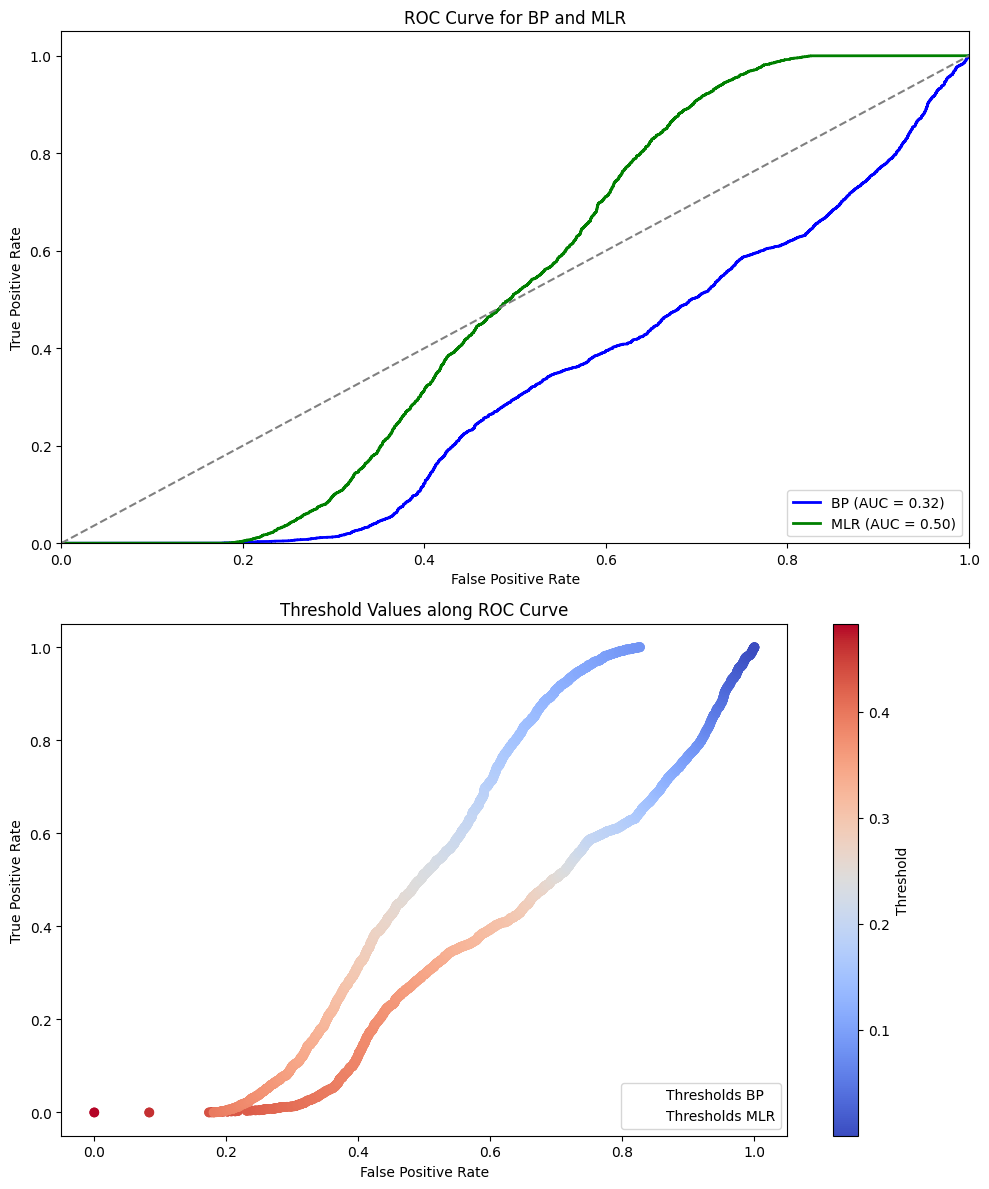

In [45]:
# Dataset 1
plot_roc_curves_bp_mlr(X_train_ring_merged, y_train_ring_merged, X_test_ring_normalized, y_test_ring_normalized, best_params_bp_D1, best_params_mlr_D1)

In [47]:
best_params_bp_D2['activation'] = 'relu'
best_params_bp_D3['activation'] = 'sigmoid'

26/26 [==============================] - 0s 2ms/step


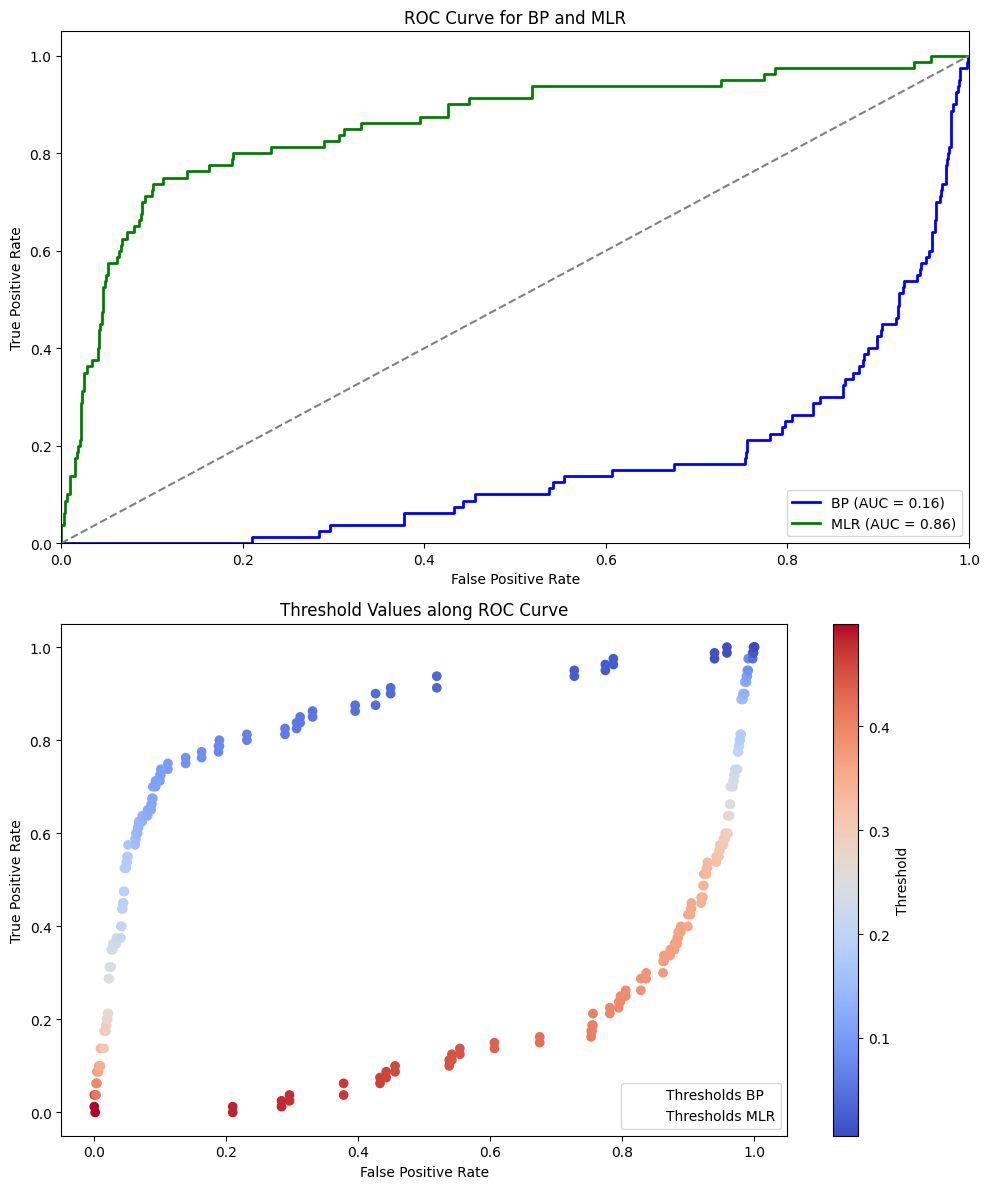

In [48]:
# Dataset 2
plot_roc_curves_bp_mlr(X_train_bank, y_train_bank, X_test_bank, y_test_bank, best_params_bp_D2, best_params_mlr_D2)

4/4 [==============================] - 0s 2ms/step


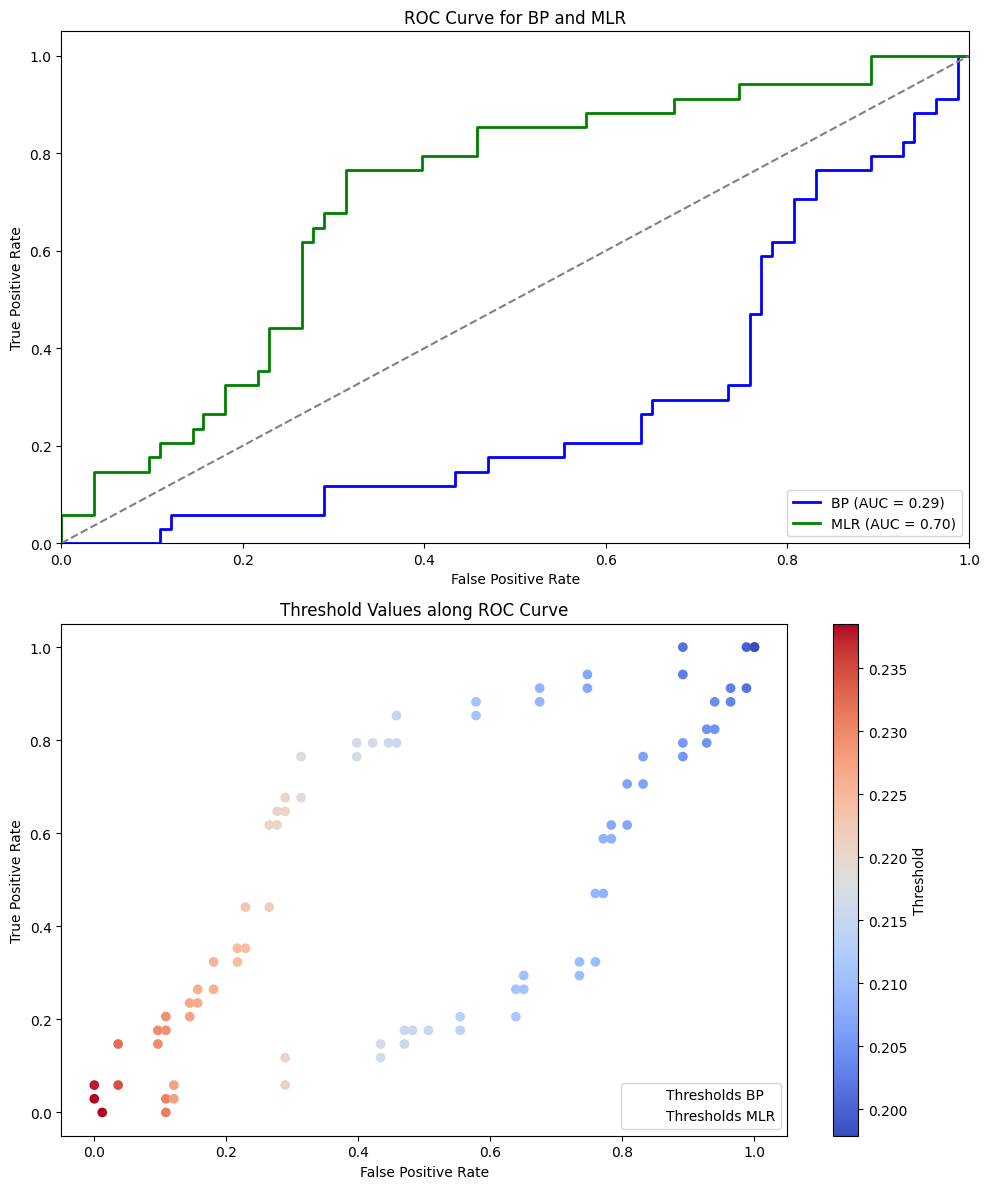

In [49]:
# Dataset 3
plot_roc_curves_bp_mlr(X_train_liver_Disorder, y_train_liver_Disorder, X_test_liver_Disorder, y_test_liver_Disorder, best_params_bp_D3, best_params_mlr_D3)

Visualization of the data to assess the performance in the classification task

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_classification_results(X_train, y_train, X_test, y_test, classifier, scaler):
    # Denormalize the data using the provided scaler
    X_train_denorm = scaler.inverse_transform(X_train)
    X_test_denorm = scaler.inverse_transform(X_test)
    
    # Perform dimensionality reduction using PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_denorm)
    X_test_pca = pca.transform(X_test_denorm)

    # Plot training data
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    for label in np.unique(y_train):
        plt.scatter(X_train_pca[y_train.flatten() == label, 0], X_train_pca[y_train.flatten() == label, 1], label=f'Training Class {label}')
    plt.title('Training Data')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()

    # Plot test data with predictions and actual labels
    plt.subplot(1, 3, 2)
    for label in np.unique(y_test):
        plt.scatter(X_test_pca[y_test.flatten() == label, 0], X_test_pca[y_test.flatten() == label, 1], label=f'Test Class {label}', alpha=0.3)  
    
    classifier.fit(X_train_pca, y_train)
    predictions = classifier.predict(X_test_pca)
    unique_labels = np.unique(np.concatenate((y_test.flatten(), predictions.flatten())))
    for label in unique_labels:
        if label in np.unique(predictions):
           plt.scatter(X_test_pca[predictions.flatten() == label, 0], X_test_pca[predictions.flatten() == label, 1], label=f'Prediction Class {label}', alpha=0.3)  
 

    # Adjust legend to include both "Test Class" instances, "Prediction" labels, and "Actual Label" markers
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = []
    added_test_labels = []
    for label in labels:
        if label.startswith('Test Class'):
            if label in added_test_labels:
                continue
            new_labels.append(label)
            added_test_labels.append(label)
    for label in labels:
        if label.startswith('Prediction') and label not in new_labels:
            new_labels.append(label)
    plt.legend(handles, new_labels)

    
    plt.title('Test Data with Predictions')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']  # Define colors for each class

    # Plot additional plot for Test Class 00 and Test Class 10 if they exist
    plt.subplot(1, 3, 3)
    for label in np.unique(y_test):
        plt.scatter(X_test_pca[y_test.flatten() == label, 0], X_test_pca[y_test.flatten() == label, 1], label=f'Test Class {label}', color=colors[int(label)])
    
    plt.title('Test Class 00 and Test Class 10')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_classification_results(X_train, y_train, X_test, y_test, classifier, scaler):
    # Denormalize the data using the provided scaler
    X_train_denorm = scaler.inverse_transform(X_train)
    X_test_denorm = scaler.inverse_transform(X_test)
    
    # Perform dimensionality reduction using PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_denorm)
    X_test_pca = pca.transform(X_test_denorm)

    # Plot training data
    plt.figure(figsize=(18, 12))

    # Plot training data
    plt.subplot(2, 2, 1)
    for label in np.unique(y_train):
        plt.scatter(X_train_pca[y_train.flatten() == label, 0], X_train_pca[y_train.flatten() == label, 1], label=f'Training Class {label}')
    plt.title('Training Data')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()

    # Plot test data with predictions
    plt.subplot(2, 2, 2)
    for label in np.unique(y_test):
        plt.scatter(X_test_pca[y_test.flatten() == label, 0], X_test_pca[y_test.flatten() == label, 1], label=f'Test Class {label}', alpha=0.3)  
    
    classifier.fit(X_train_pca, y_train)
    predictions = classifier.predict(X_test_pca)
    unique_labels = np.unique(np.concatenate((y_test.flatten(), predictions.flatten())))
    for label in unique_labels:
        if label in np.unique(predictions):
            plt.scatter(X_test_pca[predictions.flatten() == label, 0], X_test_pca[predictions.flatten() == label, 1], label=f'Prediction Class {label}', alpha=0.3, edgecolors='k', linewidths=1)  

    # Adjust legend to include both "Test Class" instances, "Prediction" labels
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = []
    added_test_labels = []
    added_prediction_labels = []  # New list to keep track of added prediction labels
    for label in labels:
        if label.startswith('Test Class'):
            if label in added_test_labels:
                continue
            new_labels.append(label)
            added_test_labels.append(label)
    for label in labels:
        if label.startswith('Prediction') and label not in new_labels and label not in added_prediction_labels:
            new_labels.append(label)
            added_prediction_labels.append(label)
    plt.legend(handles, new_labels)
    
    plt.title('Test Data with Predictions')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']  # Define colors for each class

    # Plot additional plot for Prediction Class if it exists
    plt.subplot(2, 2, 3)
    for label in np.unique(predictions):
        plt.scatter(X_test_pca[predictions.flatten() == label, 0], X_test_pca[predictions.flatten() == label, 1], label=f'Prediction Class {label}', color=colors[int(label)], alpha=0.5)
    plt.title('Prediction Data')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()

    # Plot additional plot for Test Class if exist
    plt.subplot(2, 2, 4)
    for label in np.unique(y_test):
        plt.scatter(X_test_pca[y_test.flatten() == label, 0], X_test_pca[y_test.flatten() == label, 1], label=f'Test Class {label}', color=colors[int(label)])
    plt.title('Test Class 00 and Test Class 10')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()

    plt.tight_layout()
    plt.show()

SVM


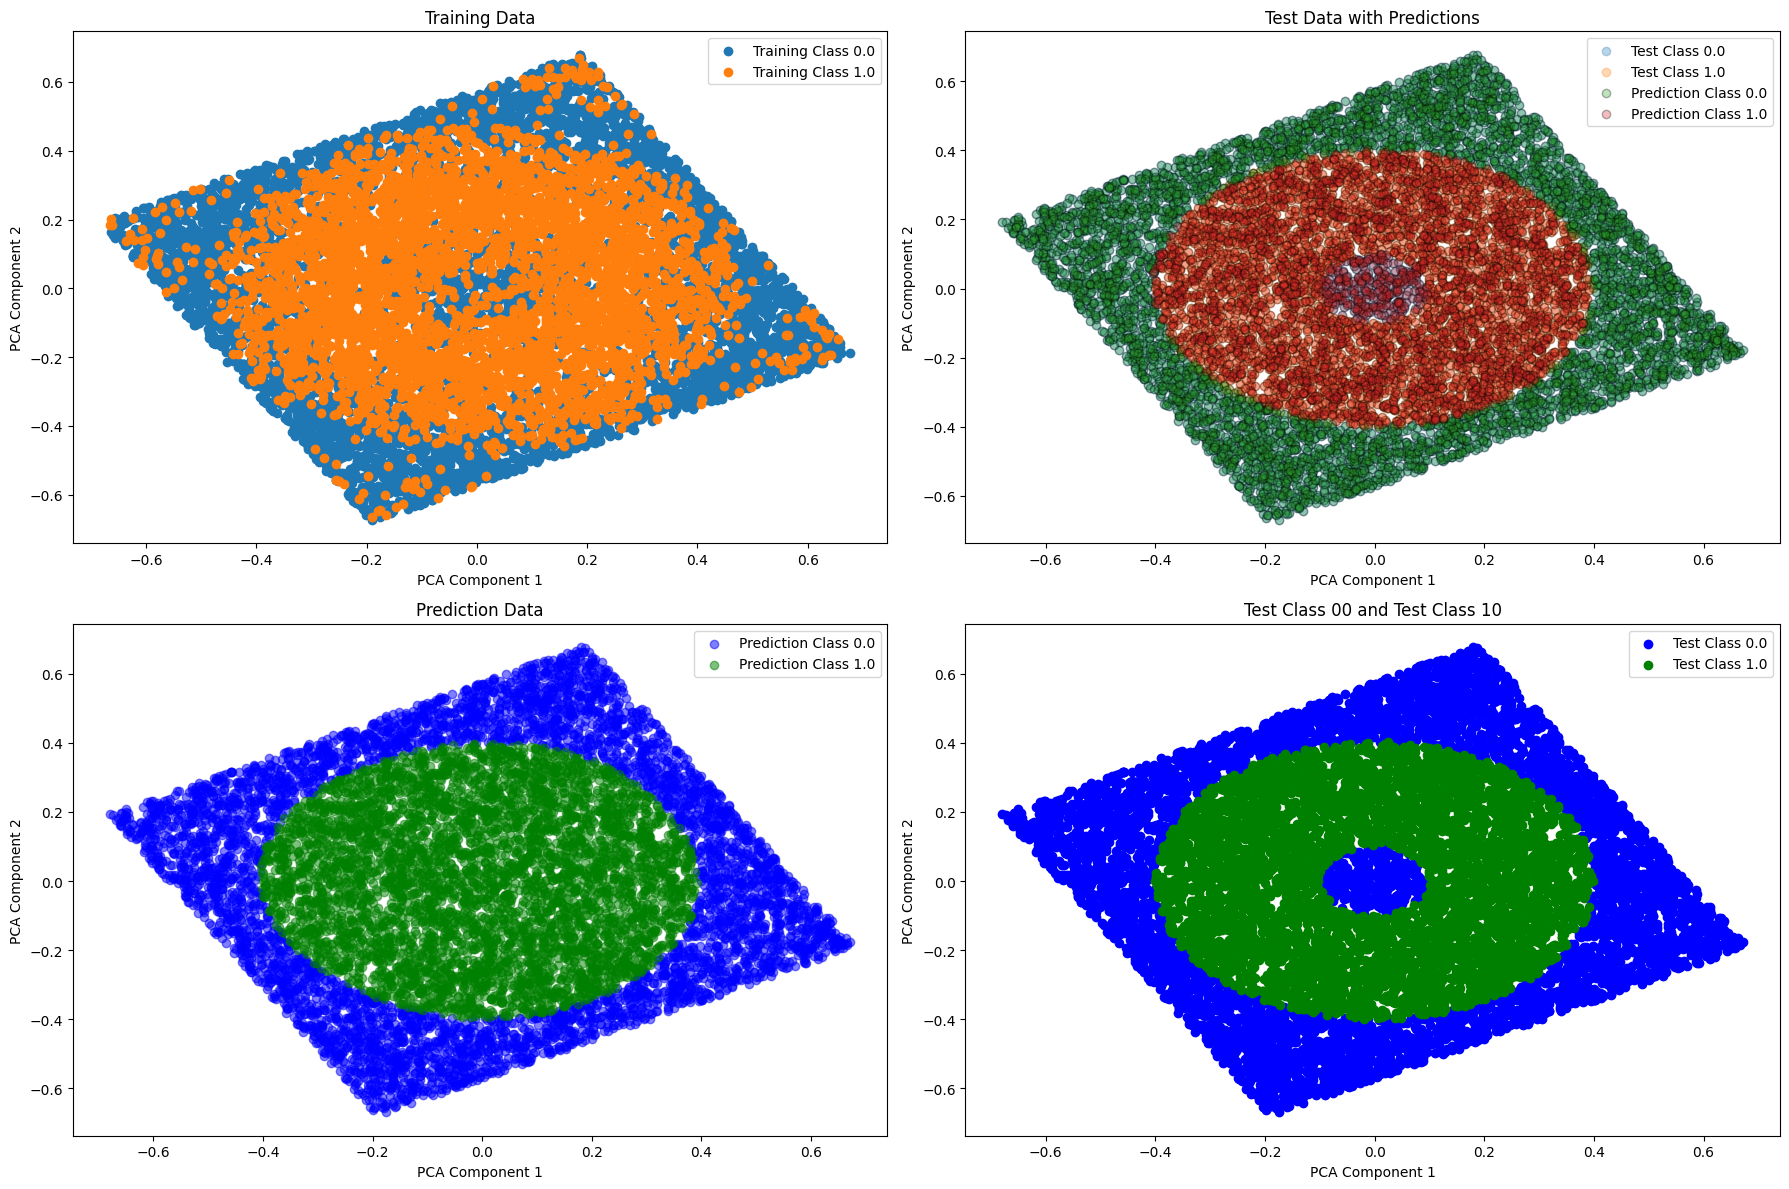

BP


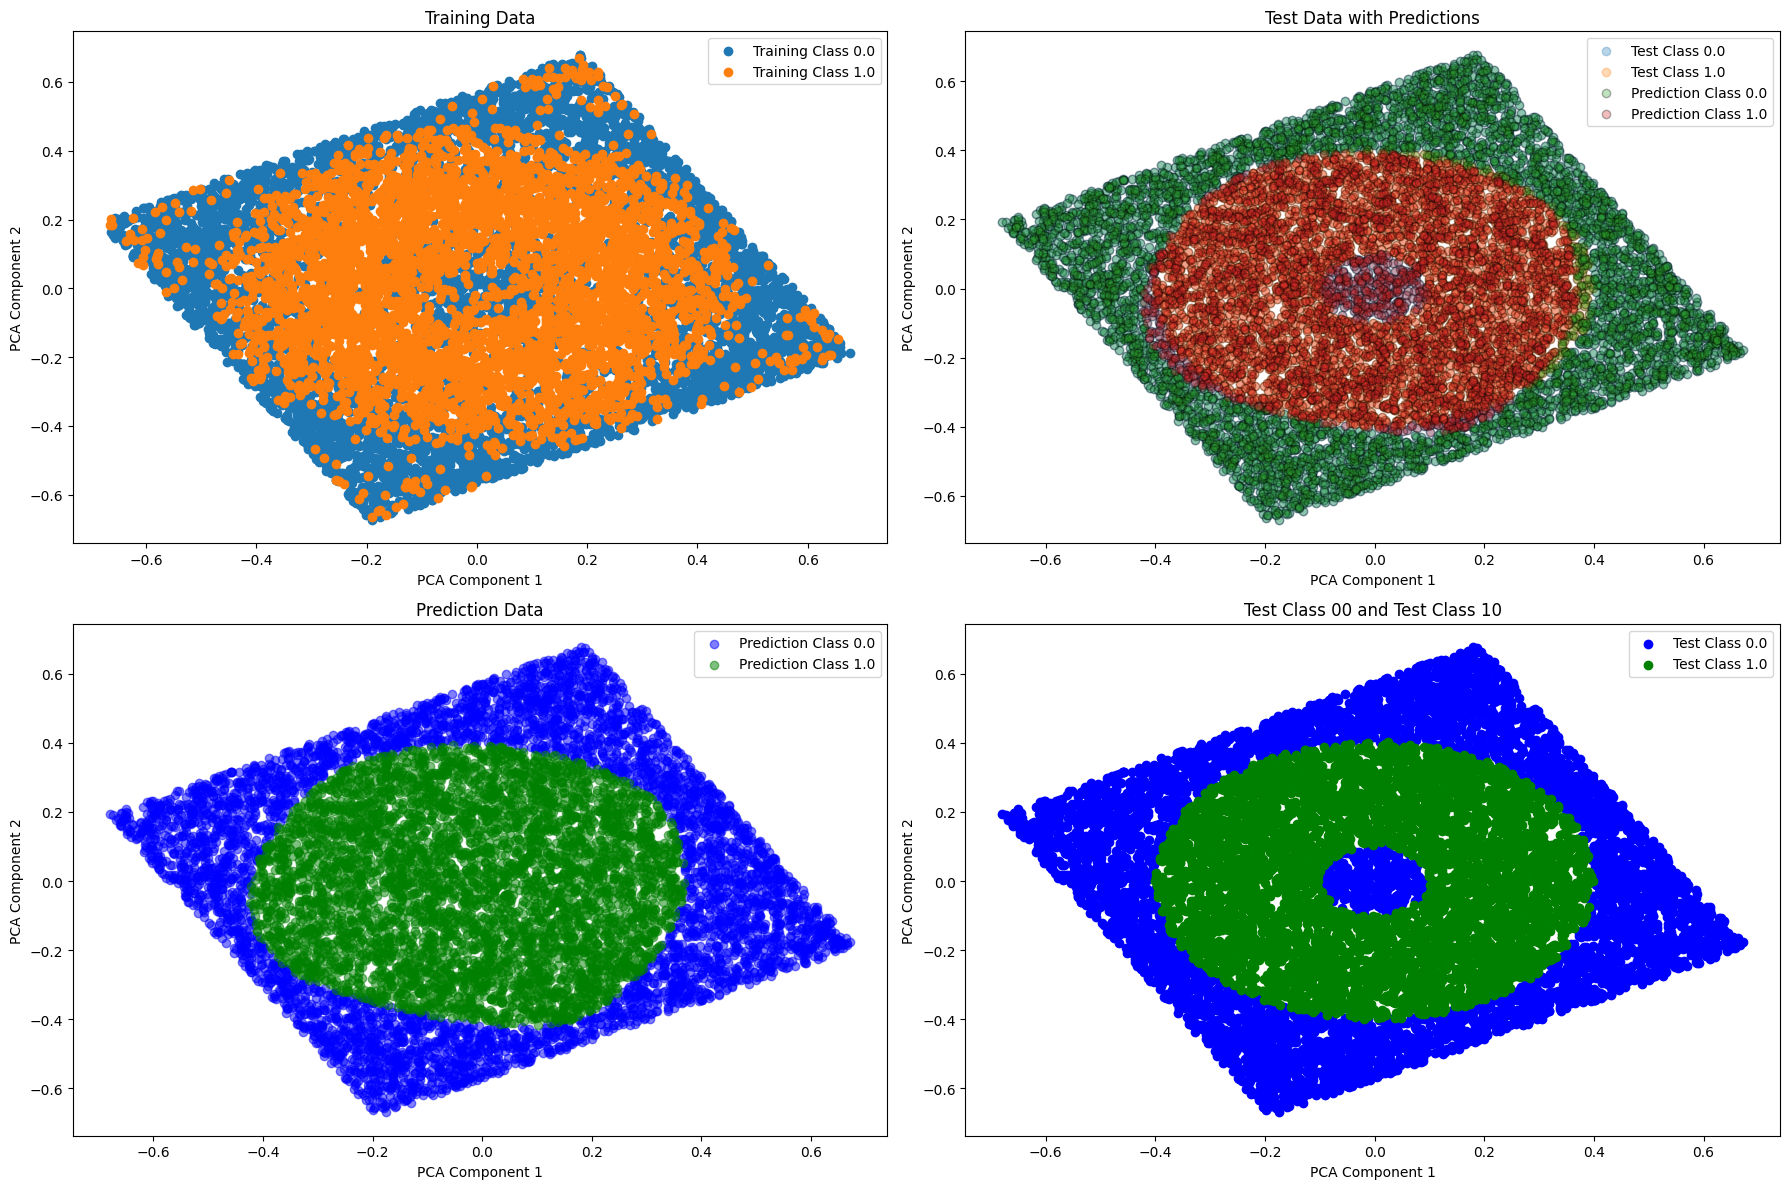

MLR


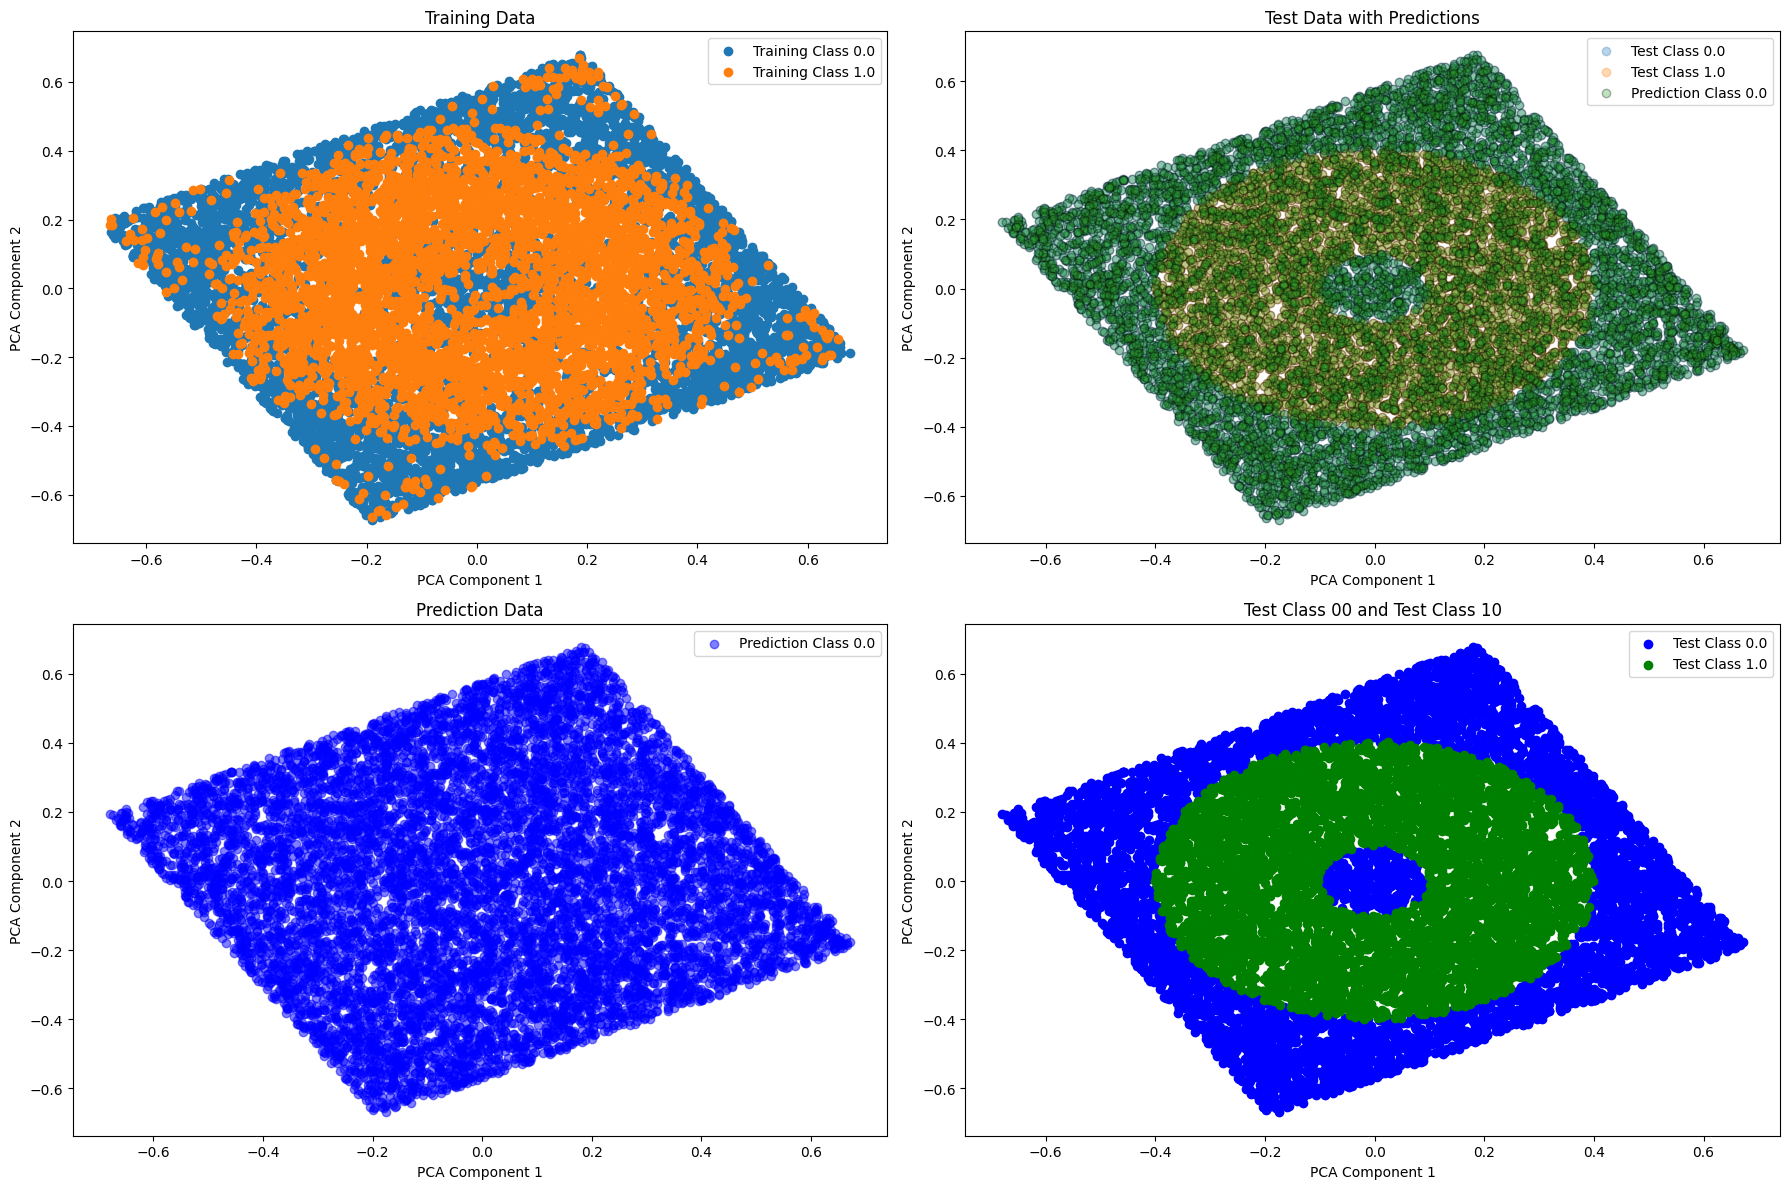

In [135]:
# SVM classifier
kernel = best_params_svm_D1['kernel']
C = best_params_svm_D1['C']
svm_classifier = SVC(kernel=kernel, C=C)
svm_classifier.fit(X_train, y_train)

# BP classifier
learning_rate_bp = best_params_bp_D1['learning_rate']
momentum_bp = best_params_bp_D1['momentum']
activation_bp = best_params_bp_D1['activation']
epochs_bp = best_params_bp_D1['epochs']
bp_classifier = MLPClassifier(hidden_layer_sizes=(32, 10, 5), activation=activation_bp, solver='sgd',
                                   learning_rate_init=learning_rate_bp, momentum=momentum_bp, max_iter=epochs_bp)
bp_classifier.fit(X_train, y_train)

# MLR
C_mlr = best_params_mlr_D1['C']
solver_mlr = best_params_mlr_D1['solver']
mlr_classifier = LogisticRegression(C=C_mlr, solver=solver_mlr)
mlr_classifier.fit(X_train, y_train)

# Dataset 1
# We denormalize the data inside the function
print("SVM")
visualize_classification_results(X_train_ring_merged, y_train_ring_merged, X_test_ring_normalized, y_test_ring_normalized, svm_classifier, scaler_ring)
print("BP")
visualize_classification_results(X_train_ring_merged, y_train_ring_merged, X_test_ring_normalized, y_test_ring_normalized, bp_classifier, scaler_ring)
print("MLR")
visualize_classification_results(X_train_ring_merged, y_train_ring_merged, X_test_ring_normalized, y_test_ring_normalized, mlr_classifier, scaler_ring)

SVM


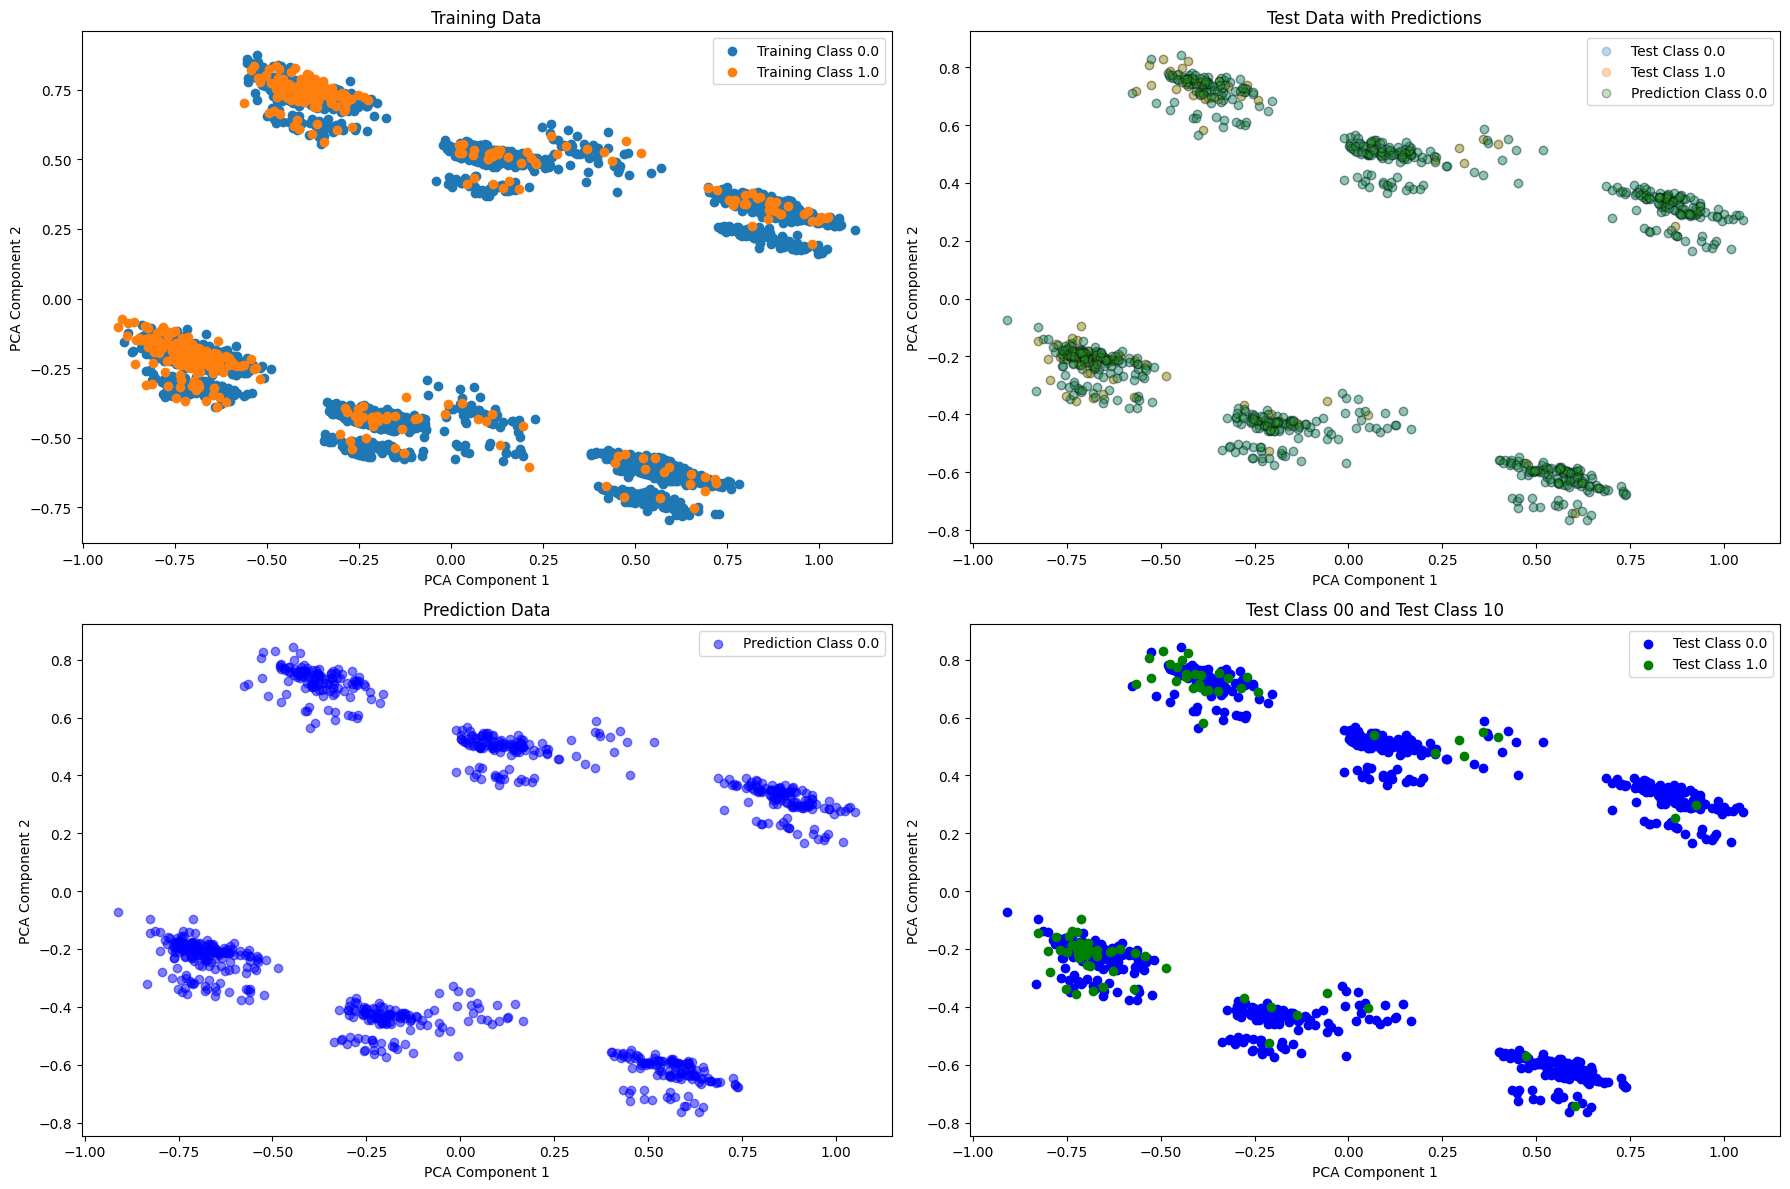

BP


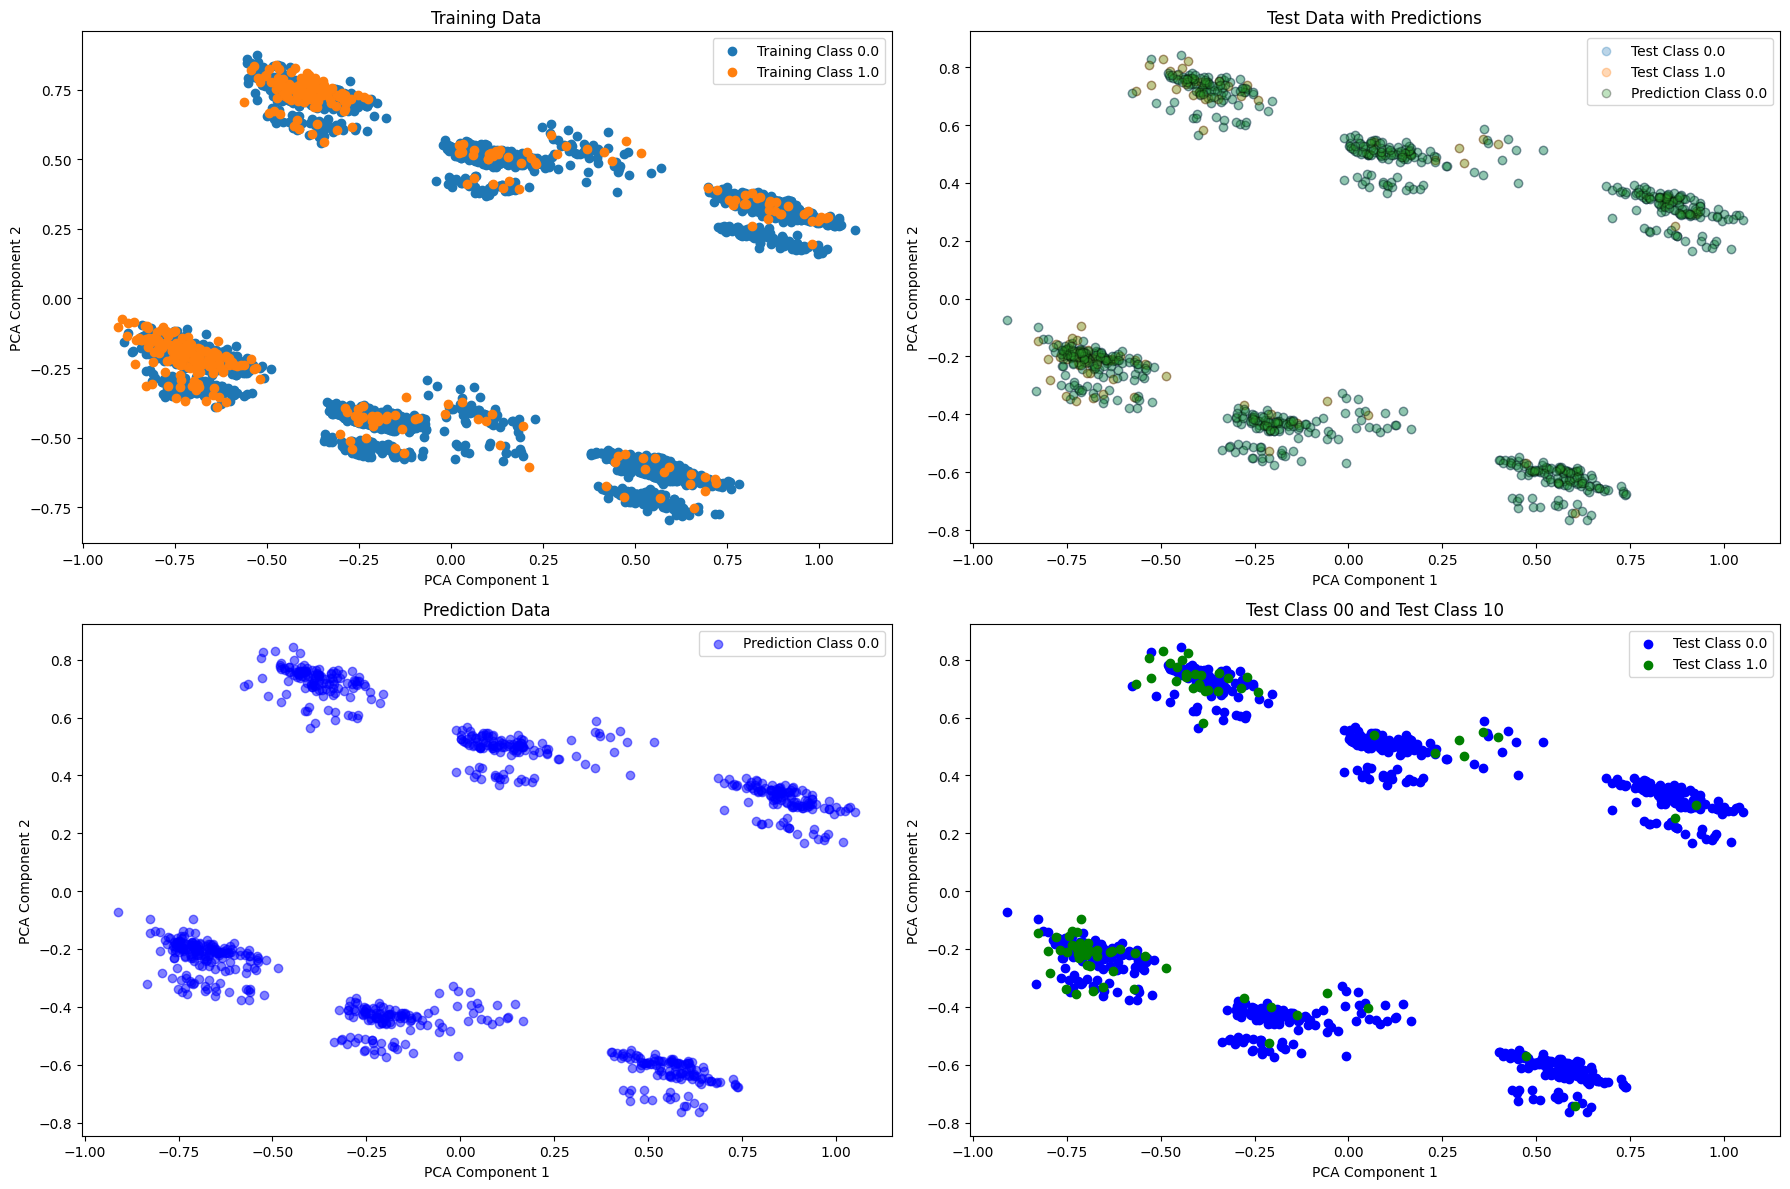

MLR


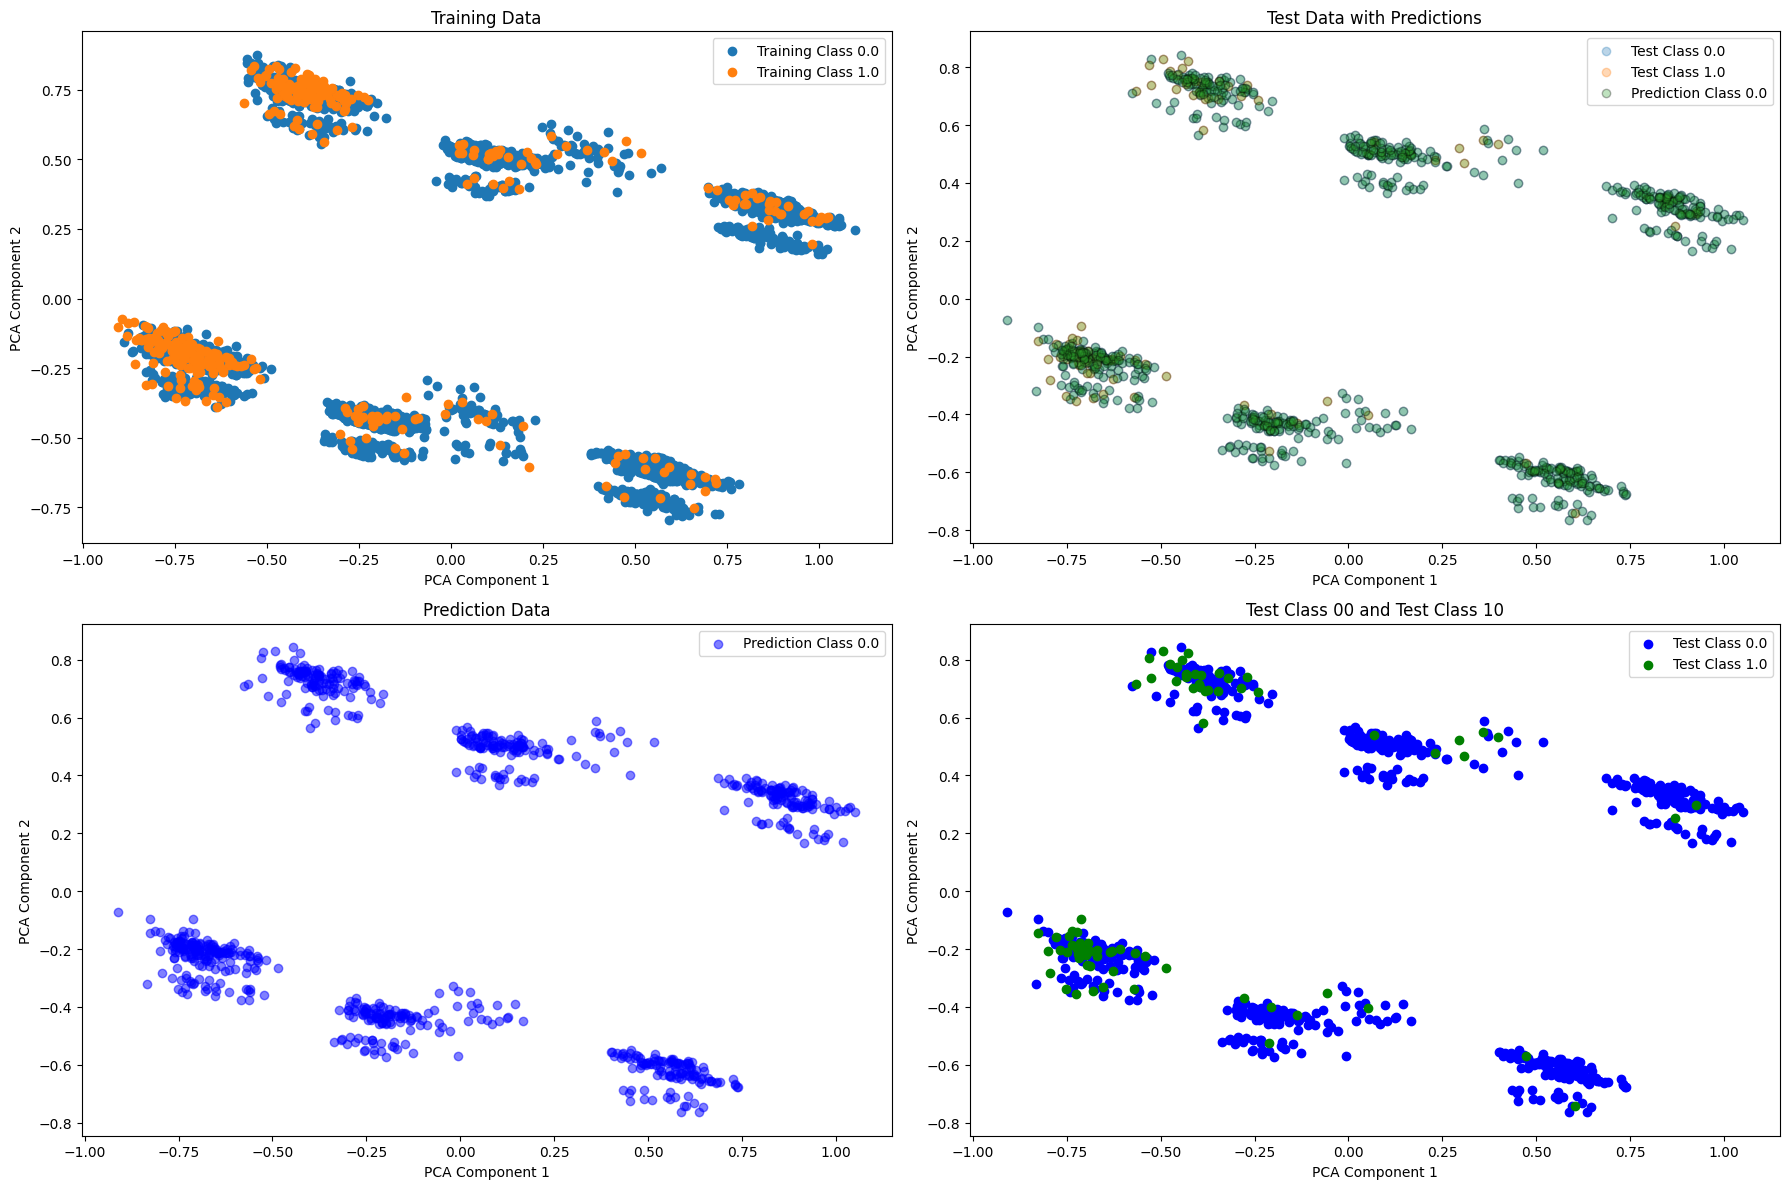

In [136]:
# SVM
kernel = best_params_svm_D2['kernel']
C = best_params_svm_D2['C']
svm_classifier = SVC(kernel=kernel, C=C)
svm_classifier.fit(X_train, y_train)

# BP
learning_rate_bp = best_params_bp_D2['learning_rate']
momentum_bp = best_params_bp_D2['momentum']
activation_bp = best_params_bp_D2_F['activation']
epochs_bp = best_params_bp_D2['epochs']
bp_classifier = MLPClassifier(hidden_layer_sizes=(32, 10, 5), activation=activation_bp, solver='sgd',
                                   learning_rate_init=learning_rate_bp, momentum=momentum_bp, max_iter=epochs_bp)
bp_classifier.fit(X_train, y_train)

#MLR
C_mlr = best_params_mlr_D2['C']
solver_mlr = best_params_mlr_D2['solver']
mlr_classifier = LogisticRegression(C=C_mlr, solver=solver_mlr)
mlr_classifier.fit(X_train, y_train)

# Dataset 2
print("SVM")
visualize_classification_results(X_train_bank, y_train_bank, X_test_bank, y_test_bank, svm_classifier, scaler_bank)
print("BP")
visualize_classification_results(X_train_bank, y_train_bank, X_test_bank, y_test_bank, bp_classifier, scaler_bank)
print("MLR")
visualize_classification_results(X_train_bank, y_train_bank, X_test_bank, y_test_bank, mlr_classifier, scaler_bank)

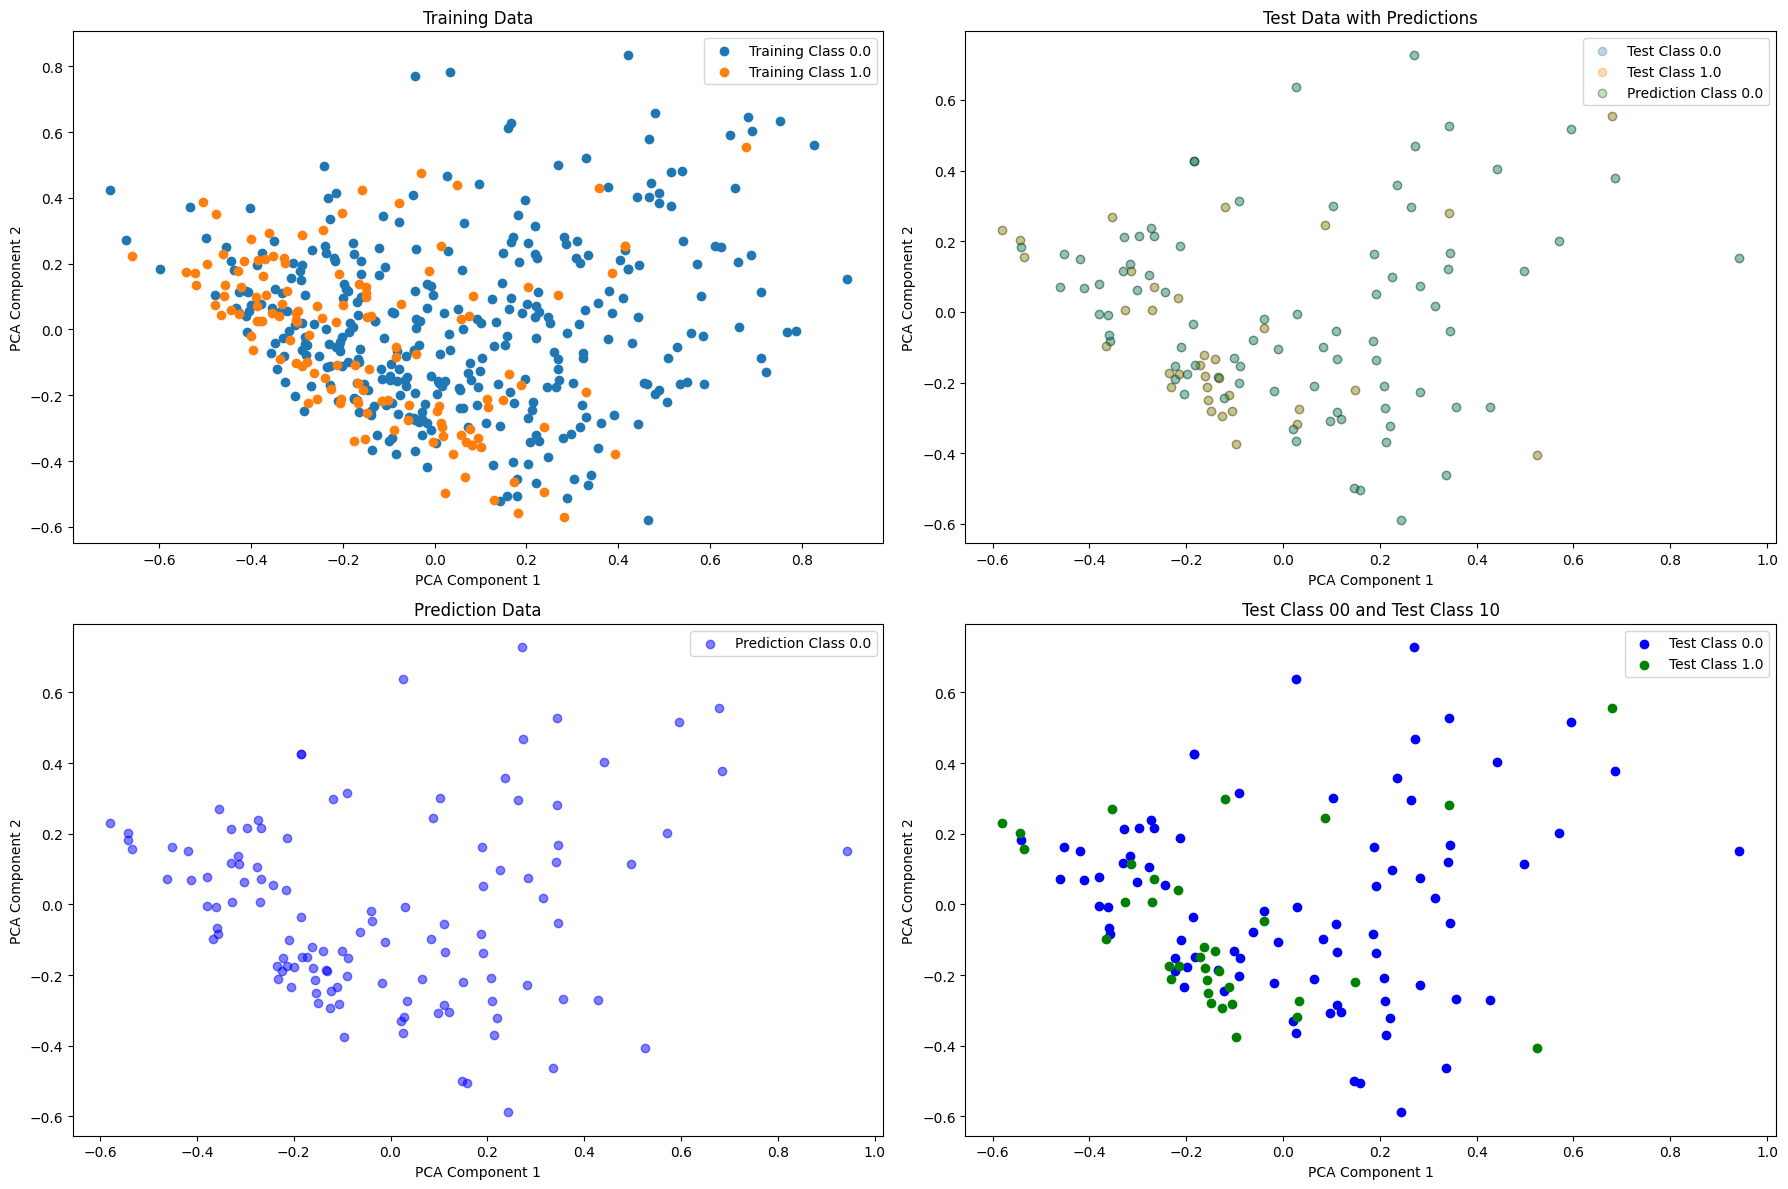

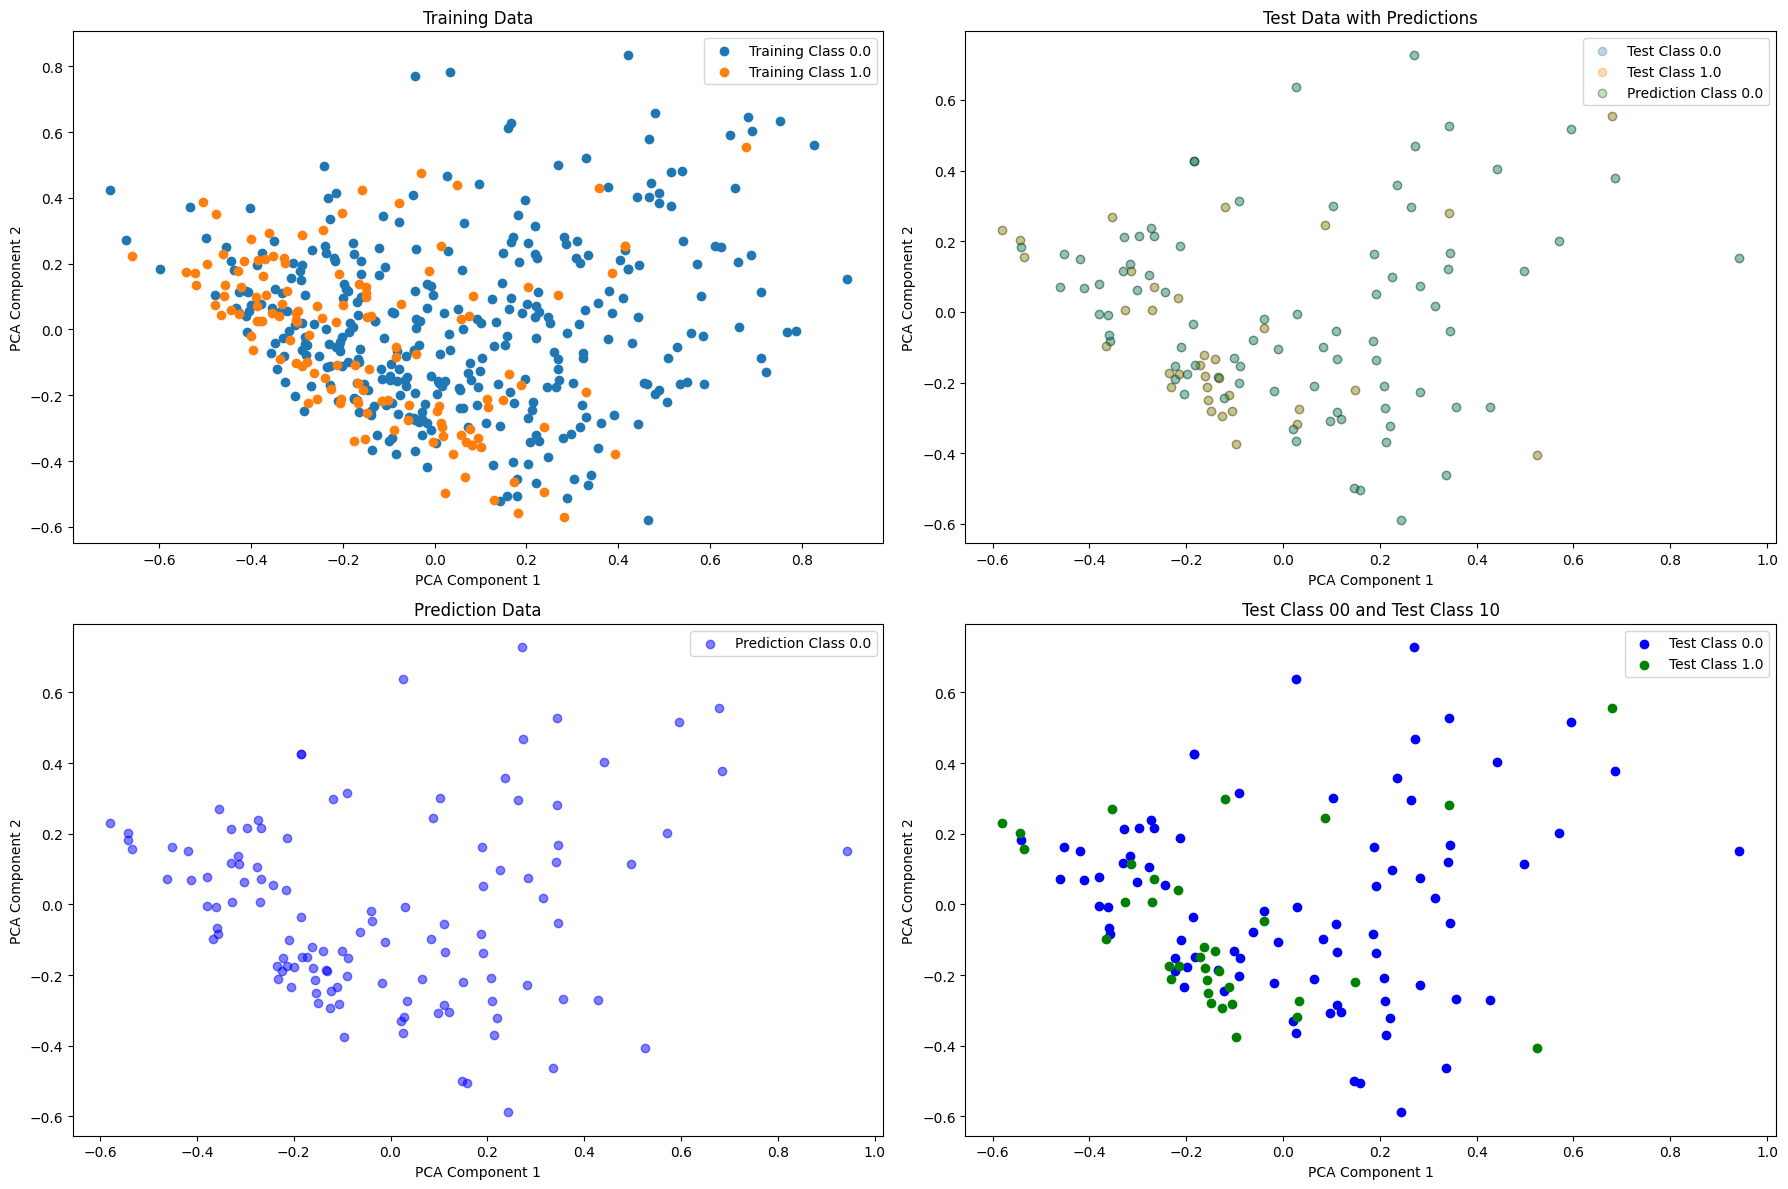

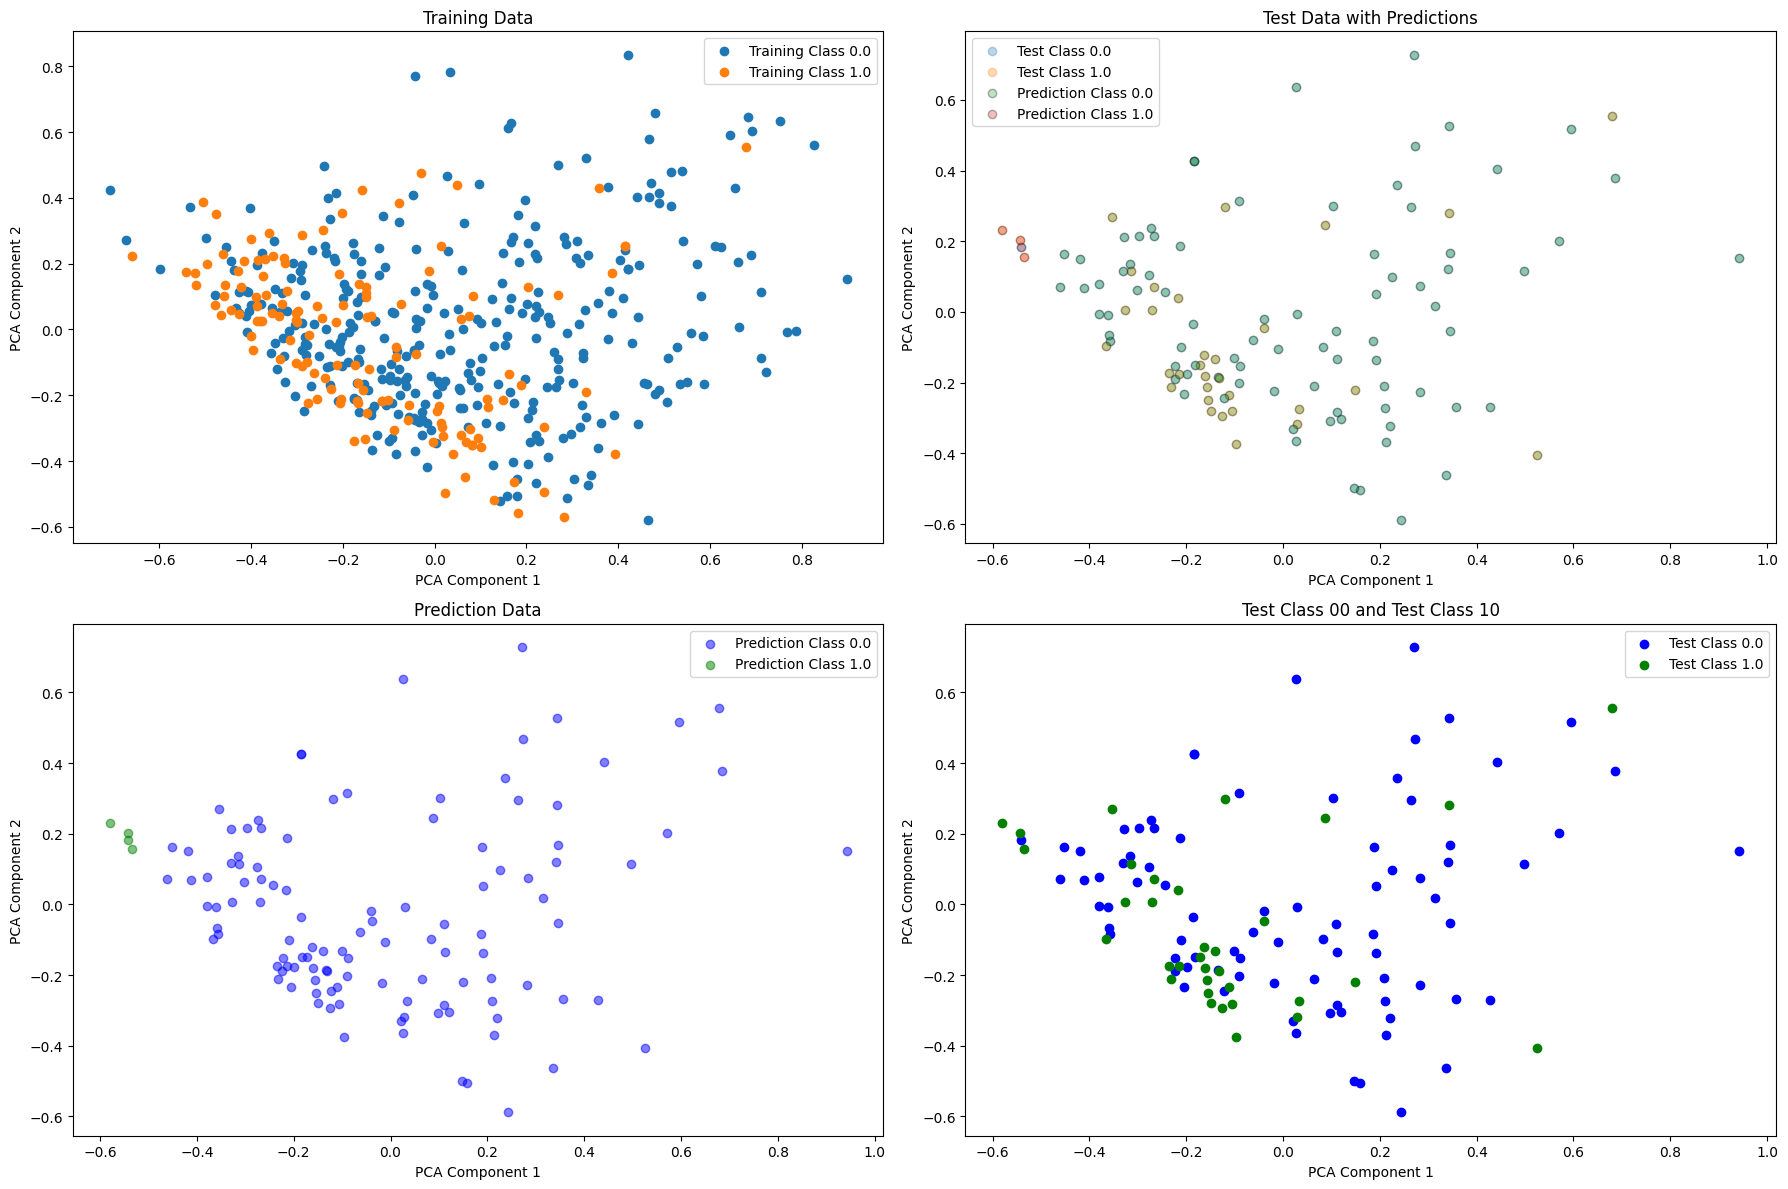

In [138]:
kernel = best_params_svm_D3['kernel']
C = best_params_svm_D3['C']
svm_classifier = SVC(kernel=kernel, C=C)
svm_classifier.fit(X_train, y_train)

learning_rate_bp = best_params_bp_D3['learning_rate']
momentum_bp = best_params_bp_D3['momentum']
activation_bp = 'identity'
epochs_bp = best_params_bp_D3['epochs']
bp_classifier = MLPClassifier(hidden_layer_sizes=(32, 10, 5), activation=activation_bp, solver='sgd',
                                   learning_rate_init=learning_rate_bp, momentum=momentum_bp, max_iter=epochs_bp)
bp_classifier.fit(X_train, y_train)

C_mlr = best_params_mlr_D3['C']
solver_mlr = best_params_mlr_D3['solver']
mlr_classifier = LogisticRegression(C=C_mlr, solver=solver_mlr)
mlr_classifier.fit(X_train, y_train)

# Dataset 3
visualize_classification_results(X_train_liver_Disorder, y_train_liver_Disorder, X_test_liver_Disorder, y_test_liver_Disorder, svm_classifier, scaler_liver_Disorder)
visualize_classification_results(X_train_liver_Disorder, y_train_liver_Disorder, X_test_liver_Disorder, y_test_liver_Disorder, bp_classifier, scaler_liver_Disorder)
visualize_classification_results(X_train_liver_Disorder, y_train_liver_Disorder, X_test_liver_Disorder, y_test_liver_Disorder, mlr_classifier, scaler_liver_Disorder)